<a href="https://colab.research.google.com/github/Pipbytes/ML-projects/blob/main/Classification_(Telco_churn)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Read in the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/Pipbytes/datasets/refs/heads/main/Classification/Telco-Customer-Churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

# EDA


## Data inspection

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [3]:
# Numeric columns statistial summary
df.describe().T

count         mean          std    min       25%       50%  \
SeniorCitizen   7032.0     0.162400     0.368844   0.00    0.0000     0.000   
tenure          7032.0    32.421786    24.545260   1.00    9.0000    29.000   
MonthlyCharges  7032.0    64.798208    30.085974  18.25   35.5875    70.350   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.4500  1397.475   

                      75%      max  
SeniorCitizen      0.0000     1.00  
tenure            55.0000    72.00  
MonthlyCharges    89.8625   118.75  
TotalCharges    3794.7375  8684.80

In [4]:
# Categorical columns statistial summary
df.describe(include='object').T

count unique               top  freq
customerID        7032   7032        7590-VHVEG     1
gender            7032      2              Male  3549
Partner           7032      2                No  3639
Dependents        7032      2                No  4933
PhoneService      7032      2               Yes  6352
MultipleLines     7032      3                No  3385
InternetService   7032      3       Fiber optic  3096
OnlineSecurity    7032      3                No  3497
OnlineBackup      7032      3                No  3087
DeviceProtection  7032      3                No  3094
TechSupport       7032      3                No  3472
StreamingTV       7032      3                No  2809
StreamingMovies   7032      3                No  2781
Contract          7032      3    Month-to-month  3875
PaperlessBilling  7032      2               Yes  4168
PaymentMethod     7032      4  Electronic check  2365
Churn             7032      2                No  5163

In [5]:
if df.isnull().sum().any():
  print('There is missing values in the dataset\n')
  print(df.isnull().sum())
elif df.isna().sum().any():
  print('There is NA values in the dataset\n')
  print(df.isnull().sum())
else:
  print('data is complete')

data is complete


## Data distribution

<Figure size 1200x600 with 0 Axes>

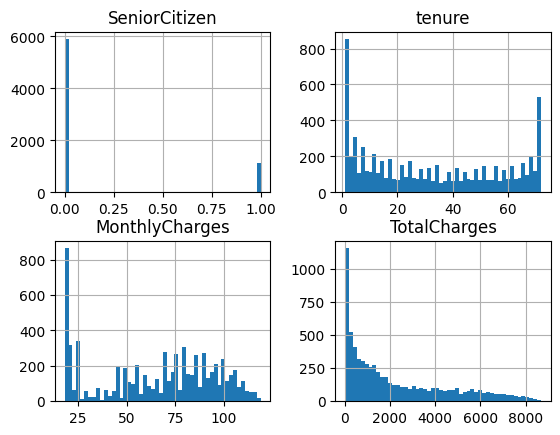

In [6]:
plt.figure(figsize=(12,6))
df.hist(bins=50)
plt.show();

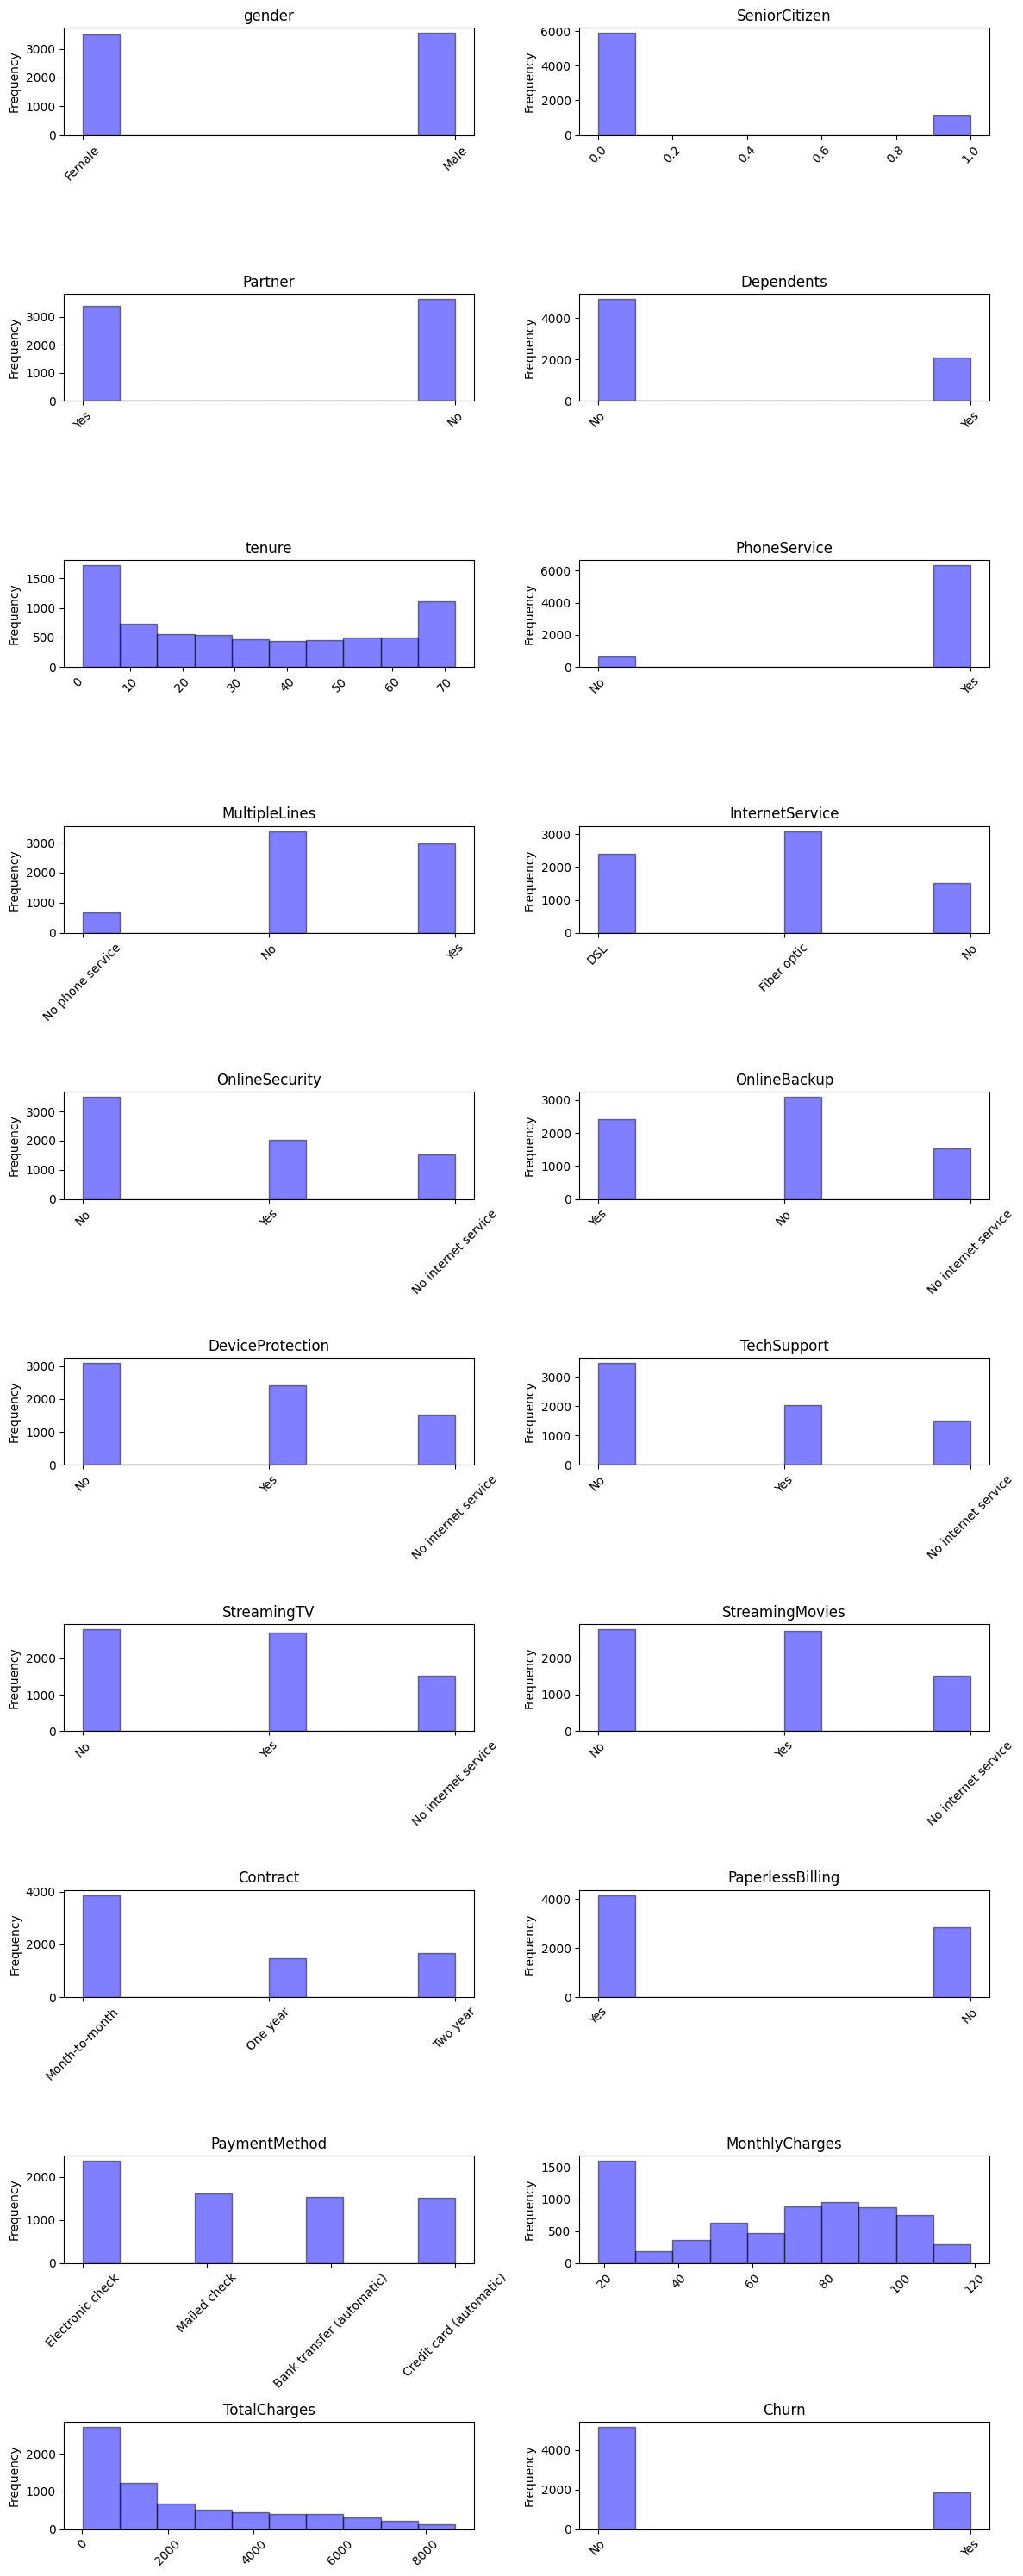

In [7]:
# set up subplots
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(12, 30), tight_layout=True)

# flatten axes array for easy iterations
axes = axes.flatten()

# histogram
for i, features in enumerate(df.columns[1:]):
    axes[i].hist(df[features], bins=10, edgecolor='black', color='b', alpha=0.5)
    axes[i].set_title(features)
    axes[i].set_ylabel('Frequency')
    axes[i].xaxis.set_tick_params(rotation=45)

# show the plot
plt.show()

## Count plot


<Axes: xlabel='Churn', ylabel='count'>

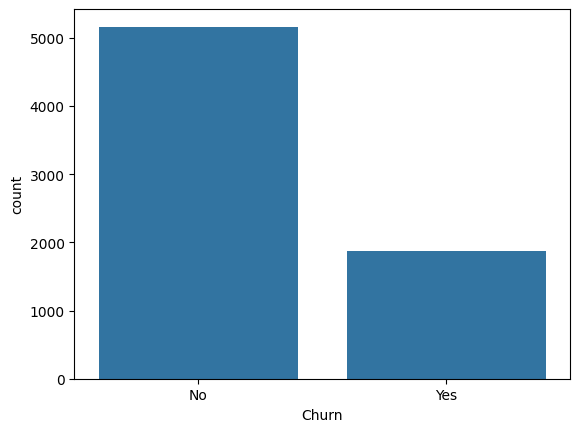

In [8]:
sns.countplot(data=df, x='Churn')

## Boxplot


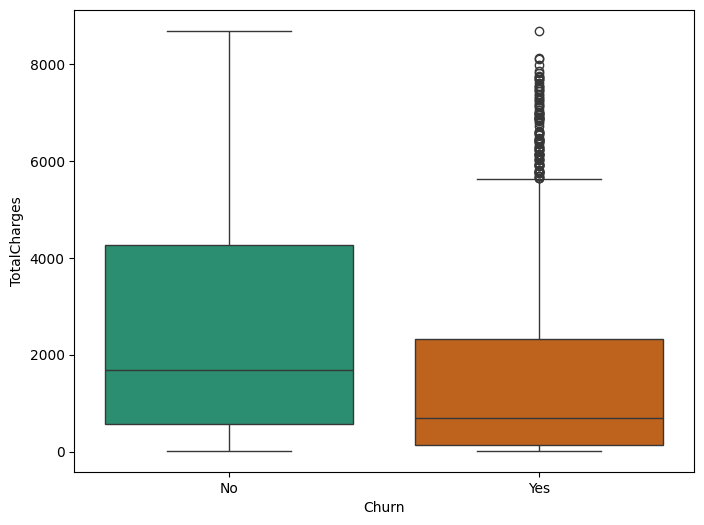

In [9]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='TotalCharges', data=df, hue='Churn', palette='Dark2')
plt.show();

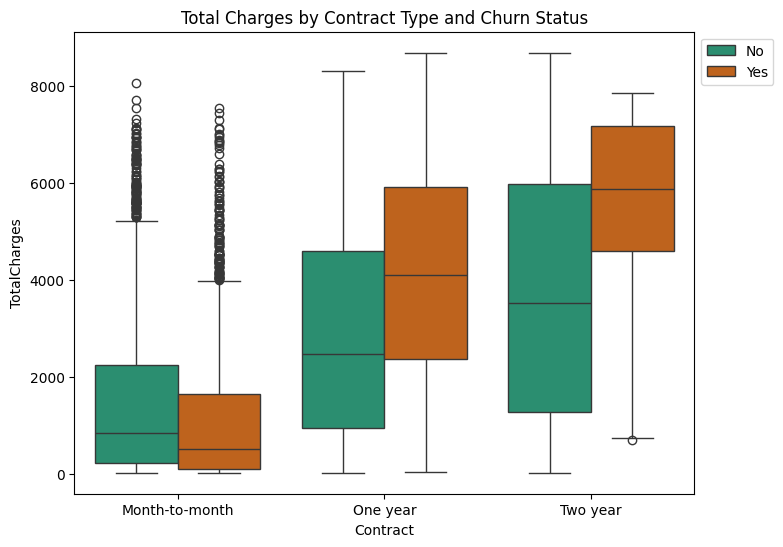

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Contract', y='TotalCharges', data=df, hue='Churn', palette='Dark2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Shifts the legend outside the plot
plt.title("Total Charges by Contract Type and Churn Status")
plt.show()

## Cat plot

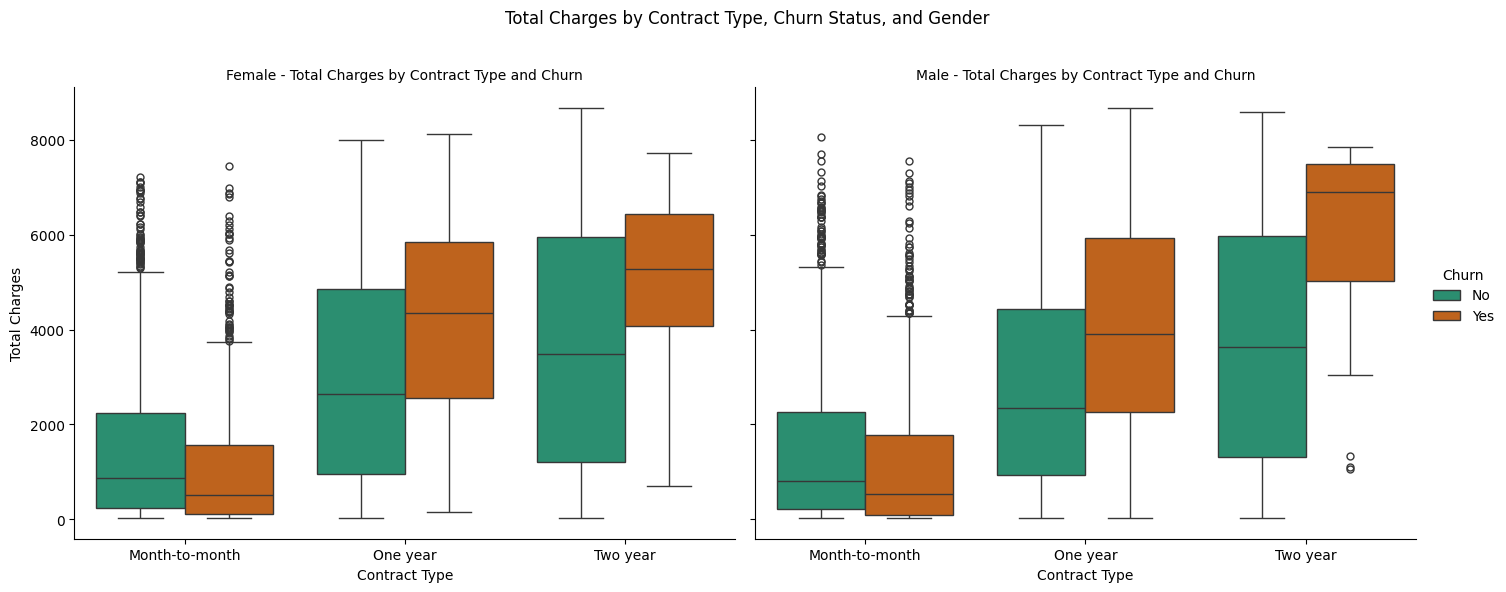

In [11]:
# Improved catplot code
import seaborn as sns
import matplotlib.pyplot as plt

# Adjusted catplot
g = sns.catplot(
    x='Contract', y='TotalCharges',
    data=df, hue='Churn', col='gender',
    palette='Dark2', kind="box",
    height=6, aspect=1.2)

# Set titles and labels
g.set_titles("{col_name} - Total Charges by Contract Type and Churn")
g.set_axis_labels("Contract Type", "Total Charges")
plt.subplots_adjust(top=0.85)  # Adjust space for the title

# Set a main title
g.fig.suptitle("Total Charges by Contract Type, Churn Status, and Gender")
plt.show()


## Correlation Analysis

In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
df_corr = df.copy()
df_corr = df.drop(columns=['customerID'], axis=1)
# obj_cols = df.select_dtypes(include='object')
# num_cols = df.select_dtypes(exclude='object')
# obj_cols = pd.get_dummies(obj_cols, dtype=int) # drop_first = True for regression, to prevent multicollinearity)
# df2 = pd.concat([obj_cols, num_cols], axis=1)
df_corr = pd.get_dummies(df_corr, dtype=int) # drop_first = True for regression, to prevent multicollinearity)
df_corr.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Female  \
0              0       1           29.85         29.85              1   
1              0      34           56.95       1889.50              0   
2              0       2           53.85        108.15              0   
3              0      45           42.30       1840.75              0   
4              0       2           70.70        151.65              1   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  ...  \
0            0           0            1              1               0  ...   
1            1           1            0              1               0  ...   
2            1           1            0              1               0  ...   
3            1           1            0              1               0  ...   
4            0           1            0              1               0  ...   

   Contract_One year  Contract_Two year  PaperlessBilling_No  \
0                  0                  0                    0   
1                  1                  0                    1   
2                  0                  0                    0   
3                  1                  0                    1   
4                  0                  0                    0   

   PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
0                     1                                        0   
1                     0                                        0   
2                     1                                        0   
3                     0                                        1   
4                     1                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  Churn_No  Churn_Yes  
0                           0         1          0  
1                           1         1          0  
2                           1         0          1  
3                           0         1          0  
4                           0         0          1  

[5 rows x 47 columns]

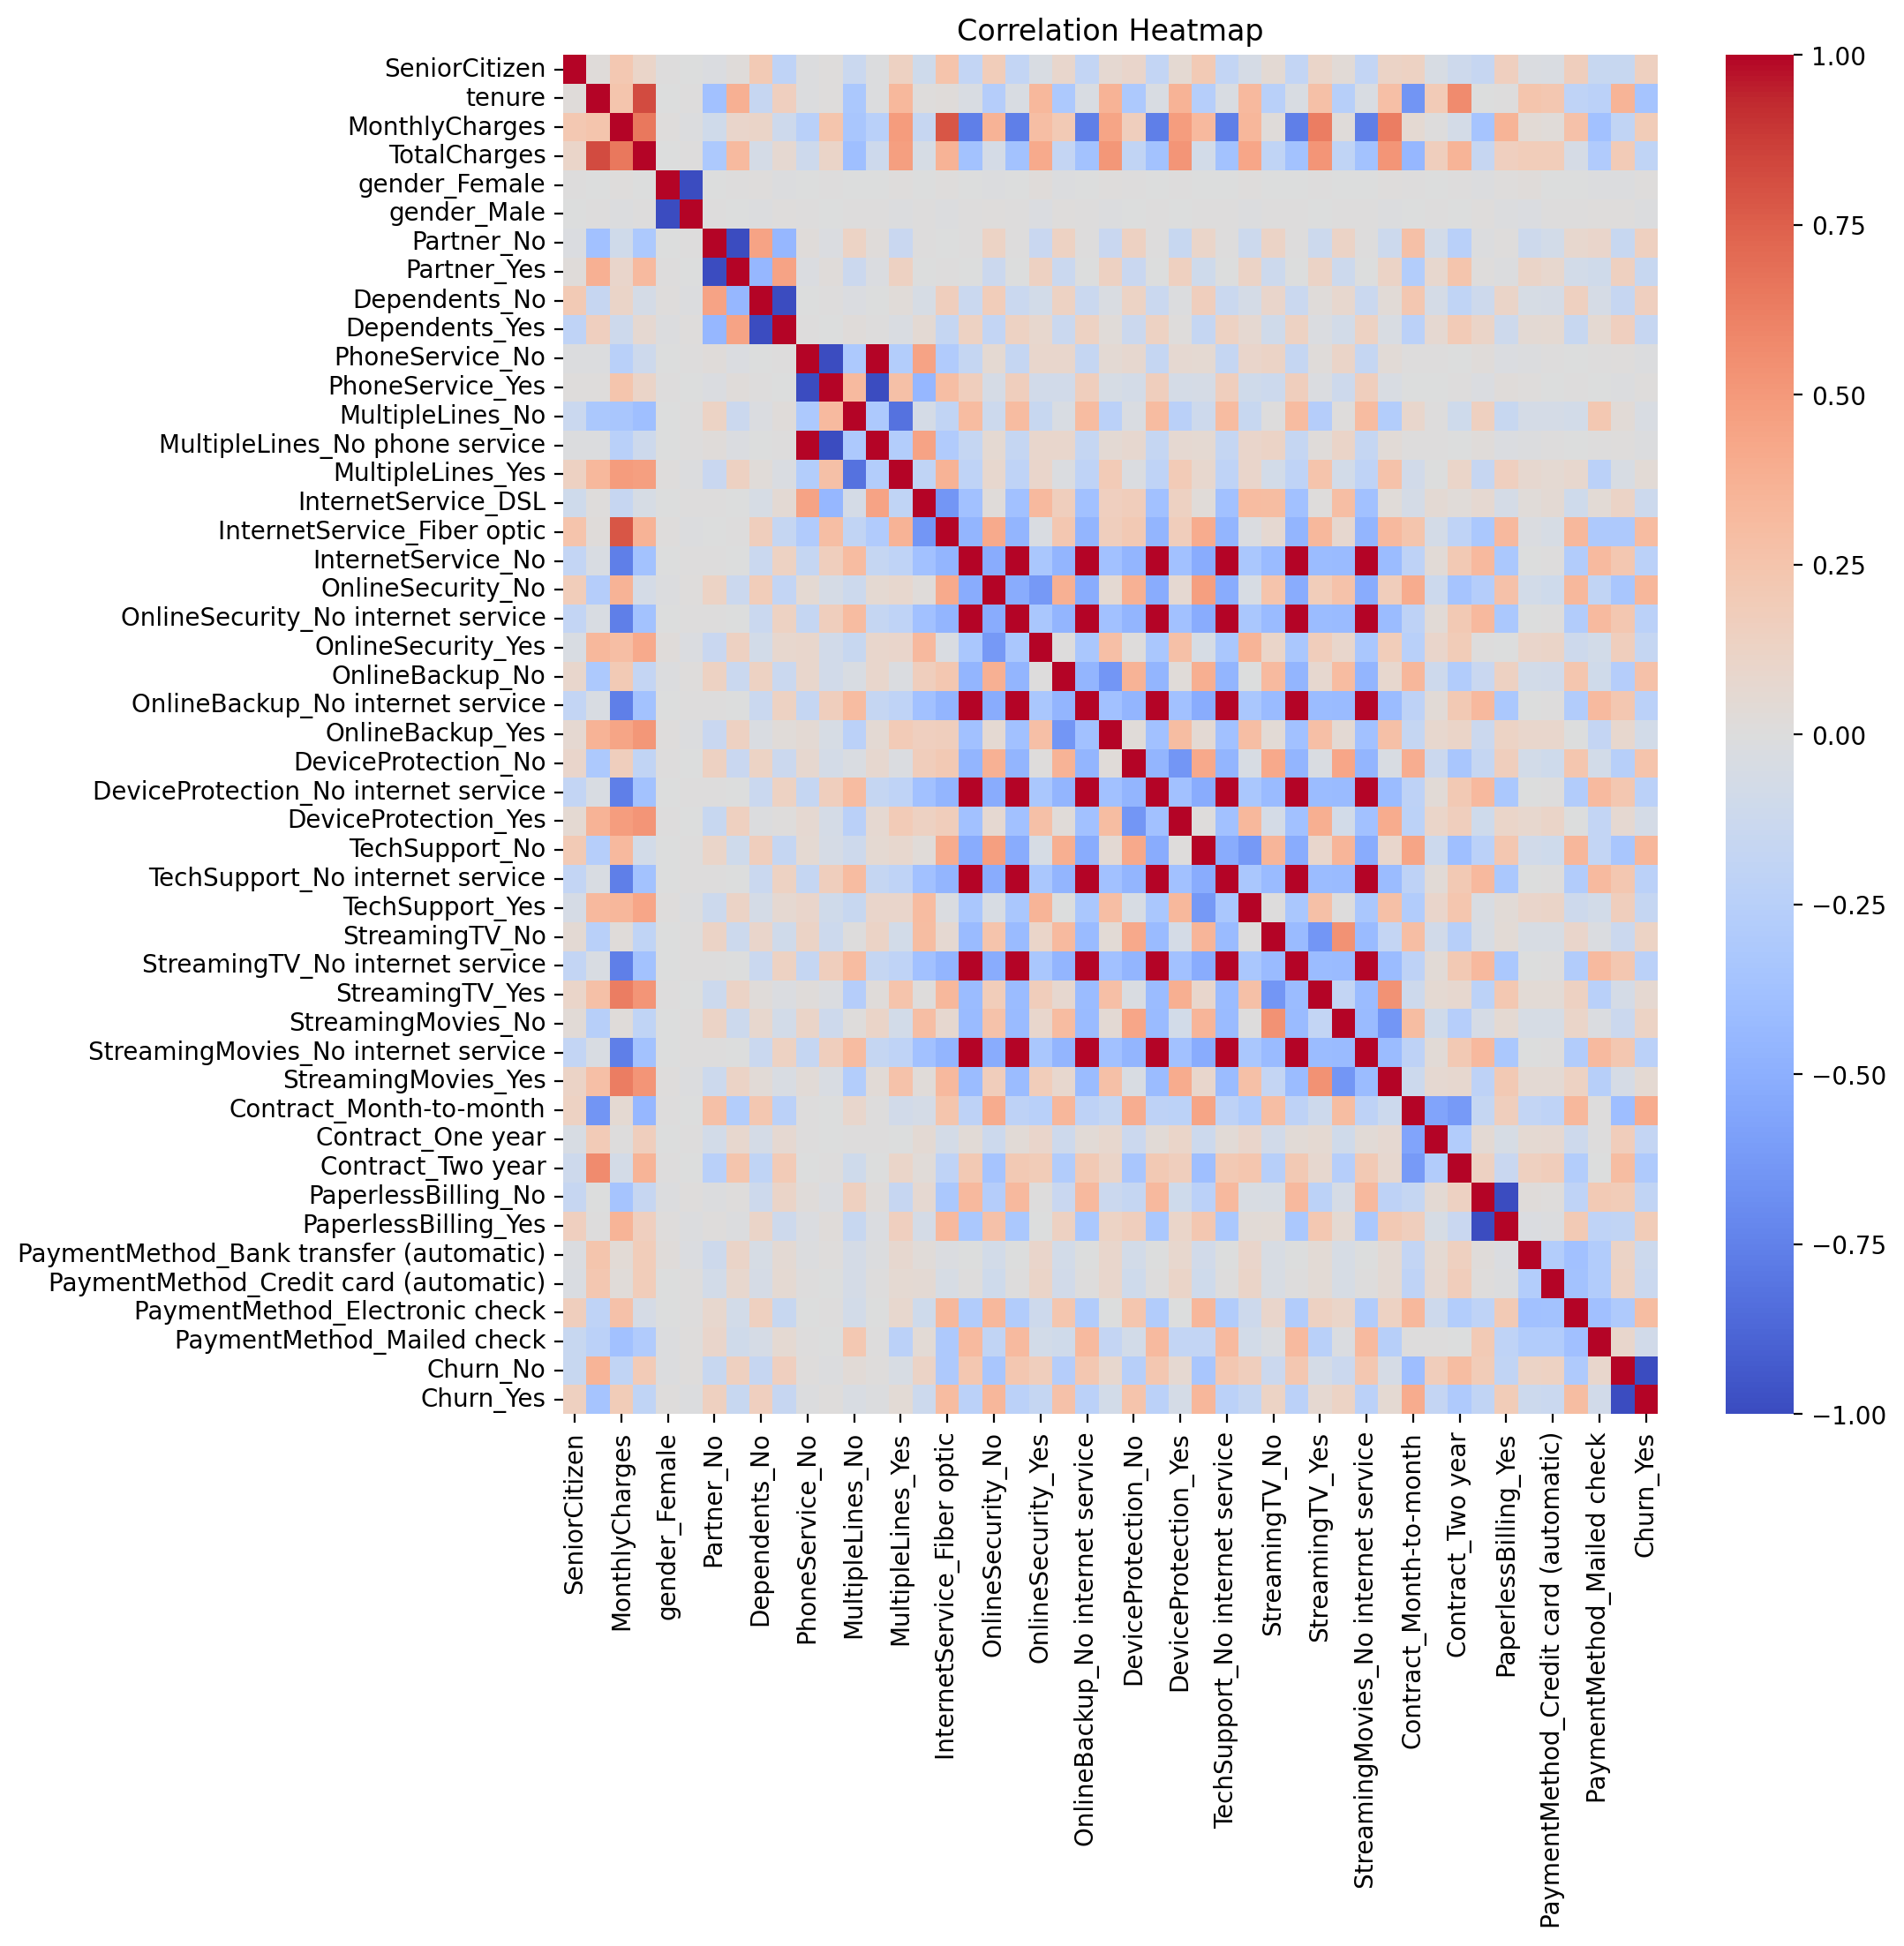

In [14]:
plt.figure(figsize=(10,10), dpi=200)
sns.heatmap(df_corr.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show();

In [15]:
df_corr.corr()['Churn_Yes'].sort_values()

Churn_No                                  -1.000000
tenure                                    -0.354049
Contract_Two year                         -0.301552
InternetService_No                        -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
StreamingMovies_No internet service       -0.227578
TotalCharges                              -0.199484
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtection_Yes                      -0.066193
MultipleLines_No                          -0.032654
PhoneService_No                           -0.011691
MultipleLines_No phone service            -0.011691
gender_Male                               -0.008545
gender_Female                              0.008545
PhoneService_Yes                           0.011691
MultipleLines_Yes                          0.040033
StreamingMovies_Yes                        0.060860
StreamingTV_Yes                            0.063254
StreamingTV_No                             0.128435
StreamingMovies_No                         0.130920
Partner_No                                 0.149982
SeniorCitizen                              0.150541
Dependents_No                              0.163128
PaperlessBilling_Yes                       0.191454
MonthlyCharges                             0.192858
DeviceProtection_No                        0.252056
OnlineBackup_No                            0.267595
PaymentMethod_Electronic check             0.301455
InternetService_Fiber optic                0.307463
TechSupport_No                             0.336877
OnlineSecurity_No                          0.342235
Contract_Month-to-month                    0.404565
Churn_Yes                                  1.000000
Name: Churn_Yes, dtype: float64

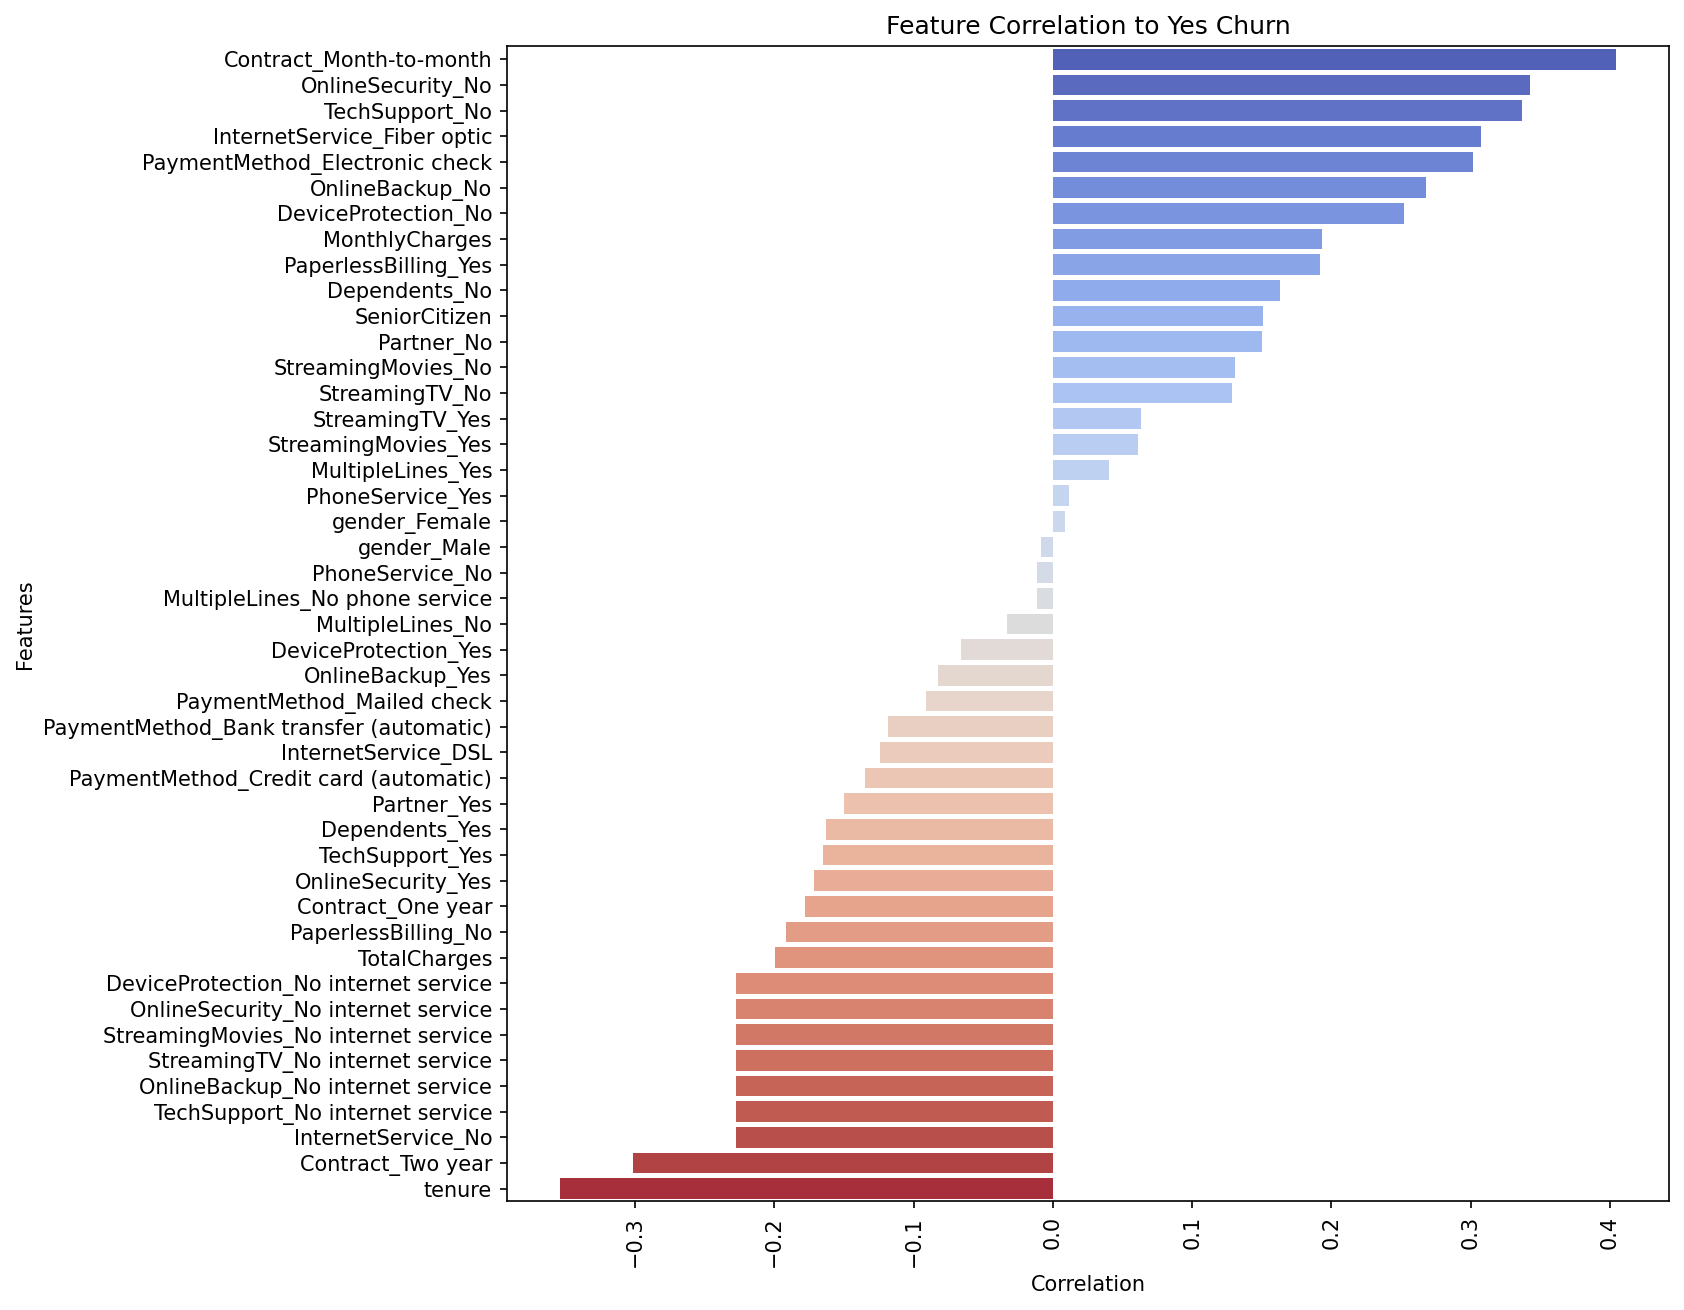

In [16]:
plt.figure(figsize=(10,10),dpi=150)

# Bar plot to exlude churn (change to vertical plot by changing x,y)
sns.barplot(y=df_corr.corr()['Churn_Yes'].sort_values(ascending=False).iloc[1:-1].index, # .iloc to not select Churn_Yes and Churn_No
            x=df_corr.corr()['Churn_Yes'].sort_values(ascending=False).iloc[1:-1].values,
            hue=df_corr.corr()['Churn_Yes'].sort_values().iloc[1:-1].index, palette='coolwarm')

plt.title("Feature Correlation to Yes Churn")
plt.ylabel('Features')
plt.xlabel('Correlation')
plt.xticks(rotation=90)
plt.legend().remove()
plt.show();

In [17]:
# cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines',
#         'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
#         'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# corr = pd.get_dummies(df[cols]).corr() # drop_first = True for regression, to prevent multicollinearity

# plt.figure(figsize=(10,10), dpi=100)
# sns.heatmap(corr, cmap='coolwarm')
# plt.show();

In [18]:
# plt.figure(figsize=(10,4),dpi=150)

# # Bar plot to exlude churn
# sns.barplot(x=corr['Churn_Yes'].sort_values().iloc[1:-1].index,
#             y=corr['Churn_Yes'].sort_values().iloc[1:-1].values,
#             hue=corr['Churn_Yes'].sort_values().iloc[1:-1].index, palette='coolwarm')

# plt.title("Feature Correlation to Yes Churn")
# plt.xlabel('Features')
# plt.ylabel('Correlation')
# plt.xticks(rotation=90);
# plt.show();

---
---

# Churn Analysis


## Contract by Churn

In [19]:
df.groupby('Contract')['Churn'].value_counts()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1306
                Yes       166
Two year        No       1637
                Yes        48
Name: count, dtype: int64

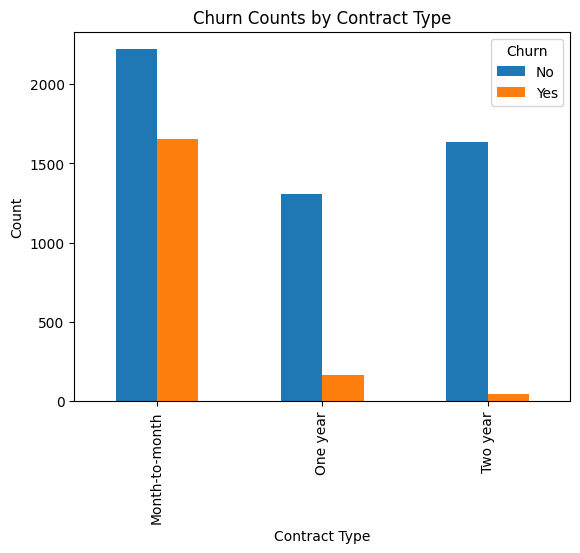

In [20]:
contract_churn = df.groupby('Contract')['Churn'].value_counts().unstack()
contract_churn.plot(kind='bar')

# Add labels and title
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.title("Churn Counts by Contract Type")
plt.show();

## Tenure by churn

<Axes: xlabel='tenure', ylabel='Count'>

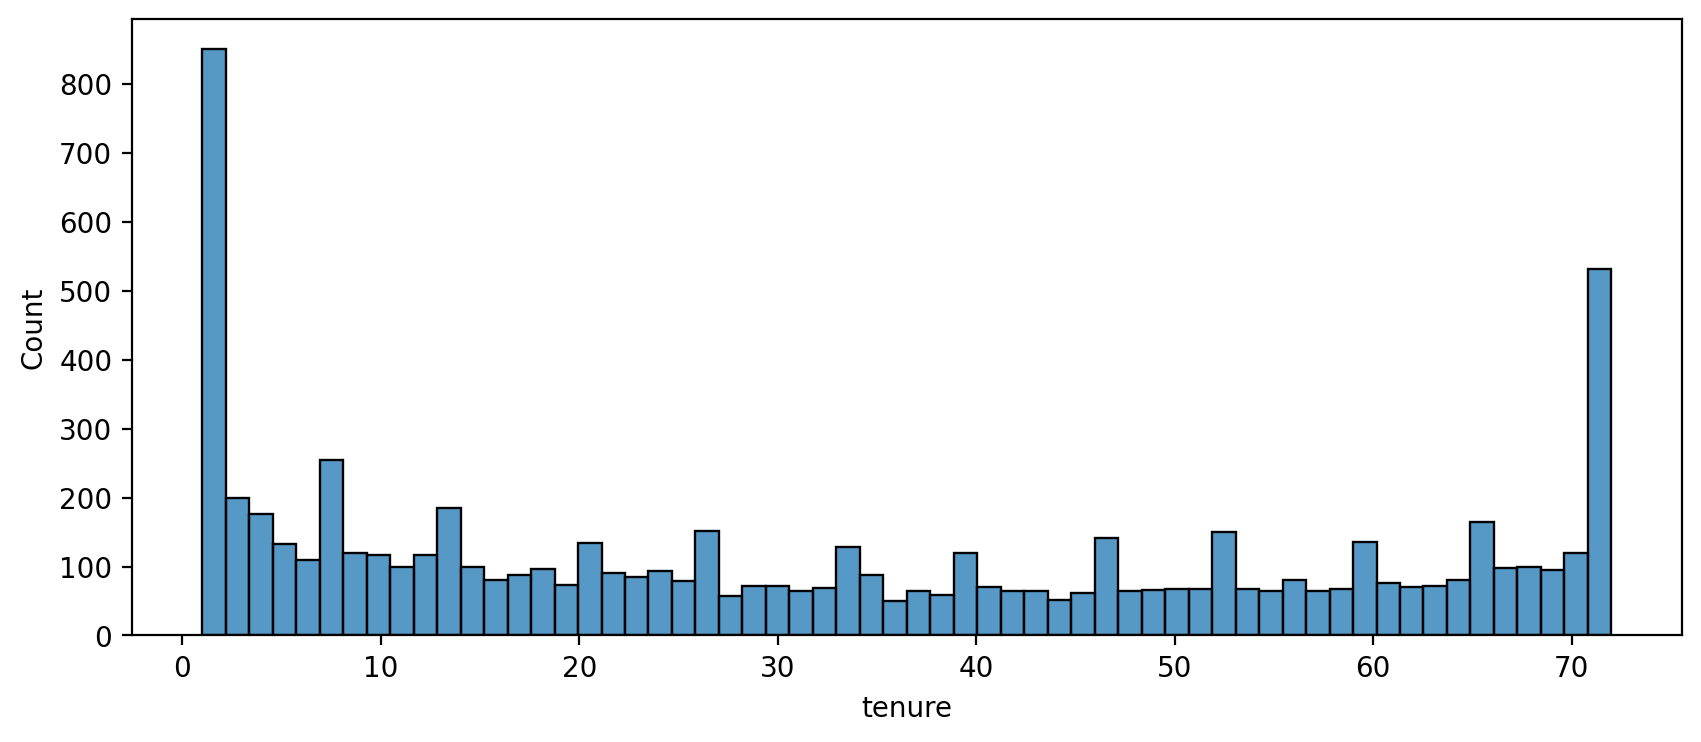

In [21]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=df,x='tenure',bins=60)

<Figure size 2000x600 with 0 Axes>

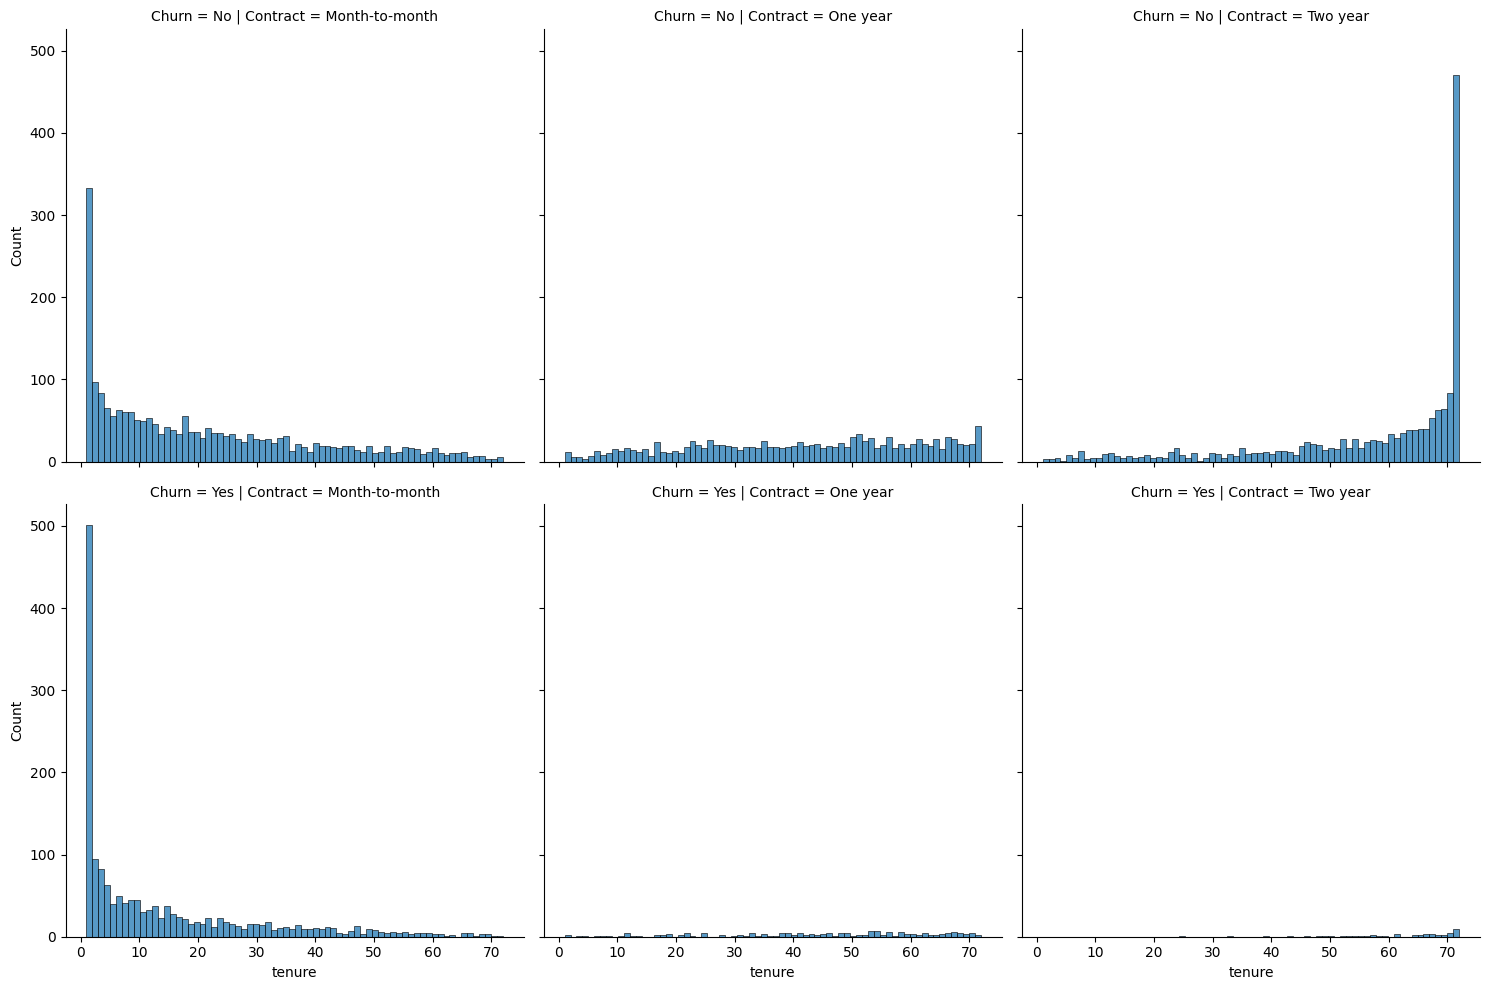

In [22]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

## Monthly vs Total by Churn

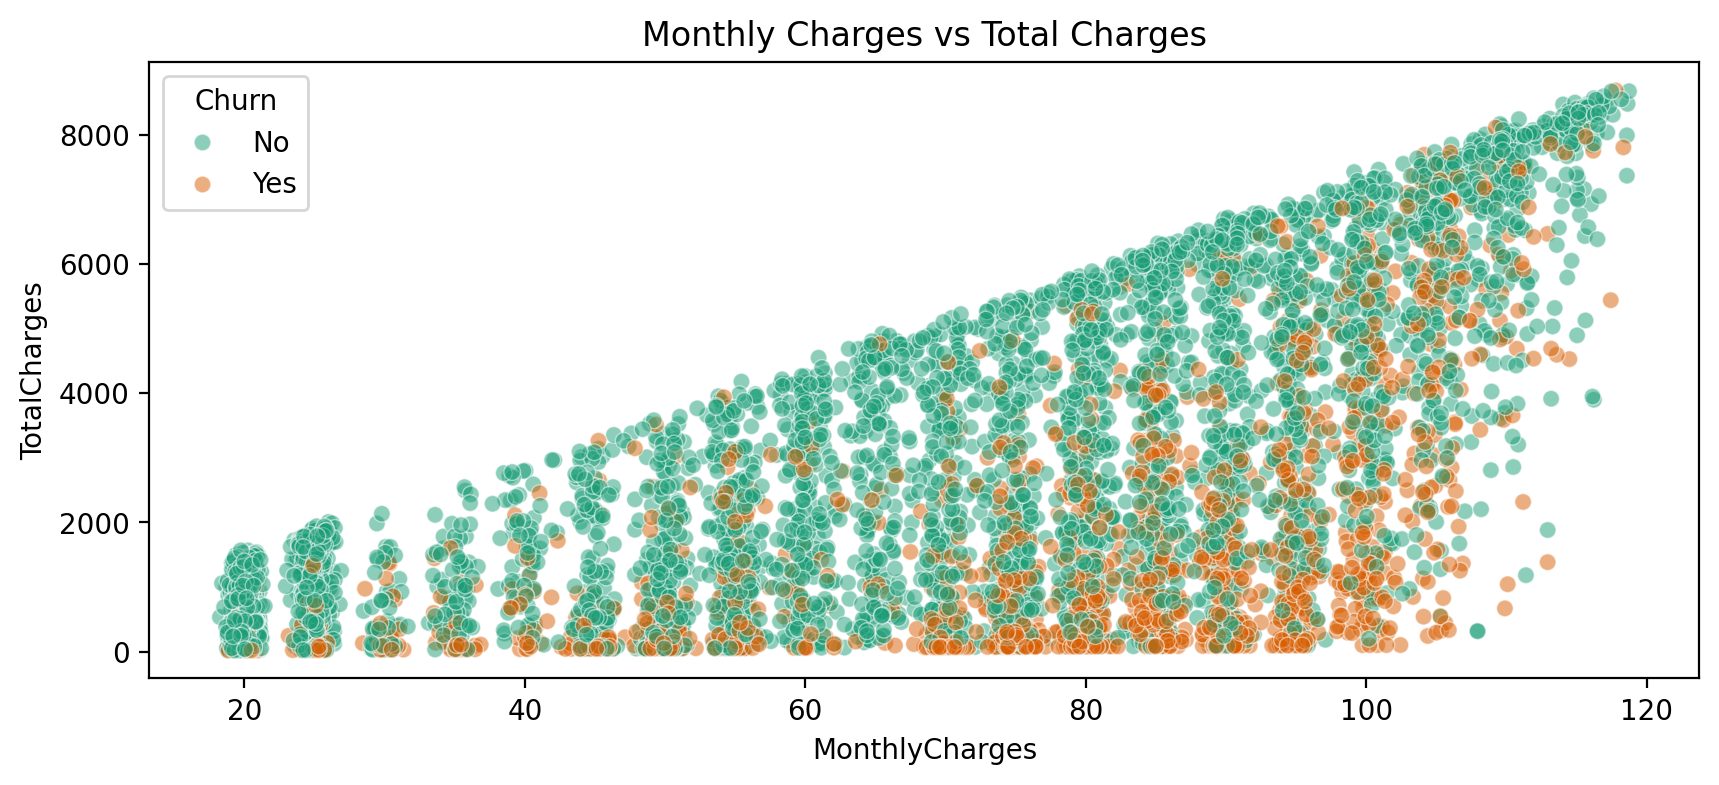

In [23]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges', hue='Churn', linewidth=0.5,alpha=0.5, palette='Dark2')
plt.title('Monthly Charges vs Total Charges')
plt.show();

## Creating Cohorts based on Tenure

In [24]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [25]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)
churn_rate

tenure                   1          2     3          4          5          6   \
customerID        61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
gender            61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
SeniorCitizen     61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
Partner           61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
Dependents        61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
PhoneService      61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
MultipleLines     61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
InternetService   61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
OnlineSecurity    61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
OnlineBackup      61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
DeviceProtection  61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
TechSupport       61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
StreamingTV       61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
StreamingMovies   61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
Contract          61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
PaperlessBilling  61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
PaymentMethod     61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
MonthlyCharges    61.990212  51.680672  47.0  47.159091  48.120301  36.363636   
TotalCharges      61.990212  51.680672  47.0  47.159091  48.120301  36.363636   

tenure                   7          8          9          10  ...        63  \
customerID        38.931298  34.146341  38.655462  38.793103  ...  5.555556   
gender            38.931298  34.146341  38.655462  38.793103  ...  5.555556   
SeniorCitizen     38.931298  34.146341  38.655462  38.793103  ...  5.555556   
Partner           38.931298  34.146341  38.655462  38.793103  ...  5.555556   
Dependents        38.931298  34.146341  38.655462  38.793103  ...  5.555556   
PhoneService      38.931298  34.146341  38.655462  38.793103  ...  5.555556   
MultipleLines     38.931298  34.146341  38.655462  38.793103  ...  5.555556   
InternetService   38.931298  34.146341  38.655462  38.793103  ...  5.555556   
OnlineSecurity    38.931298  34.146341  38.655462  38.793103  ...  5.555556   
OnlineBackup      38.931298  34.146341  38.655462  38.793103  ...  5.555556   
DeviceProtection  38.931298  34.146341  38.655462  38.793103  ...  5.555556   
TechSupport       38.931298  34.146341  38.655462  38.793103  ...  5.555556   
StreamingTV       38.931298  34.146341  38.655462  38.793103  ...  5.555556   
StreamingMovies   38.931298  34.146341  38.655462  38.793103  ...  5.555556   
Contract          38.931298  34.146341  38.655462  38.793103  ...  5.555556   
PaperlessBilling  38.931298  34.146341  38.655462  38.793103  ...  5.555556   
PaymentMethod     38.931298  34.146341  38.655462  38.793103  ...  5.555556   
MonthlyCharges    38.931298  34.146341  38.655462  38.793103  ...  5.555556   
TotalCharges      38.931298  34.146341  38.655462  38.793103  ...  5.555556   

tenure             64         65         66         67   68        69  \
customerID        5.0  11.842105  14.606742  10.204082  9.0  8.421053   
gender            5.0  11.842105  14.606742  10.204082  9.0  8.421053   
SeniorCitizen     5.0  11.842105  14.606742  10.204082  9.0  8.421053   
Partner           5.0  11.842105  14.606742  10.204082  9.0  8.421053   
Dependents        5.0  11.842105  14.606742  10.204082  9.0  8.421053   
PhoneService      5.0  11.842105  14.606742  10.204082  9.0  8.421053   
MultipleLines     5.0  11.842105  14.606742  10.204082  9.0  8.421053   
InternetService   5.0  11.842105  14.606742  10.204082  9.0  8.421053   
OnlineSecurity    5.0  11.842105  14.606742  10.204082  9.0  8.421053   
OnlineBackup      5.0  11.842105  14.606742  10.204082  9.0  8.42105

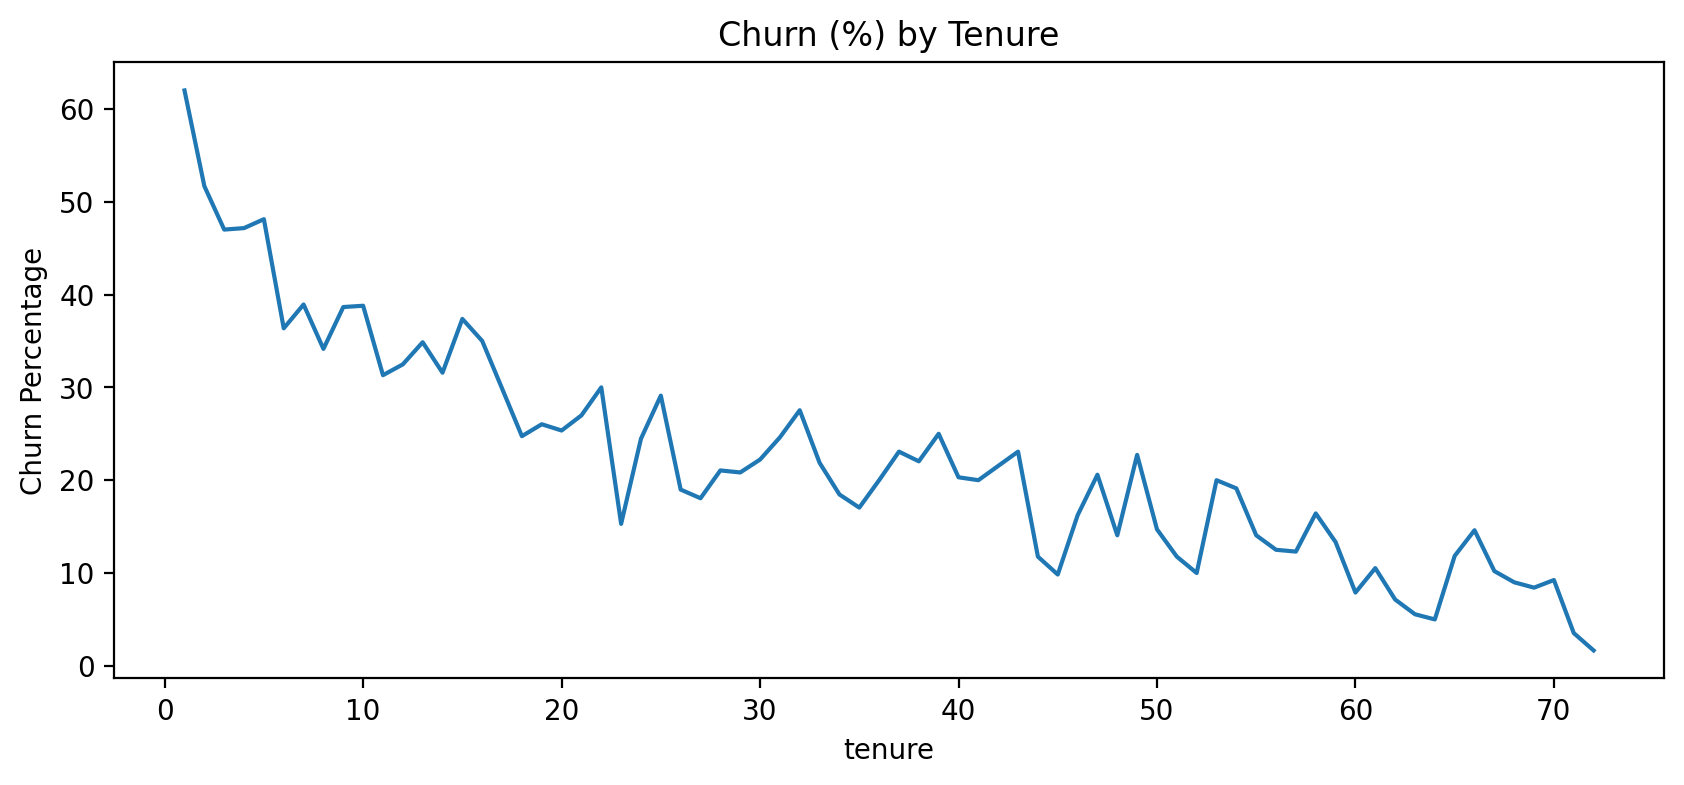

In [26]:
plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage')
plt.title('Churn (%) by Tenure');

## Broader Cohort Groups

**Create a broader cohort on the tenure column values with 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [27]:
def cohort(tenure):
  if tenure <= 12:
    return '0-12 months'
  elif tenure <= 24:
    return '12-24 months'
  elif tenure <= 48:
    return '24-48 months'
  else:
    return 'over 48 months'

In [28]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)
df[['tenure','Tenure Cohort']]

tenure   Tenure Cohort
0          1     0-12 months
1         34    24-48 months
2          2     0-12 months
3         45    24-48 months
4          2     0-12 months
...      ...             ...
7027      24    12-24 months
7028      72  over 48 months
7029      11     0-12 months
7030       4     0-12 months
7031      66  over 48 months

[7032 rows x 2 columns]

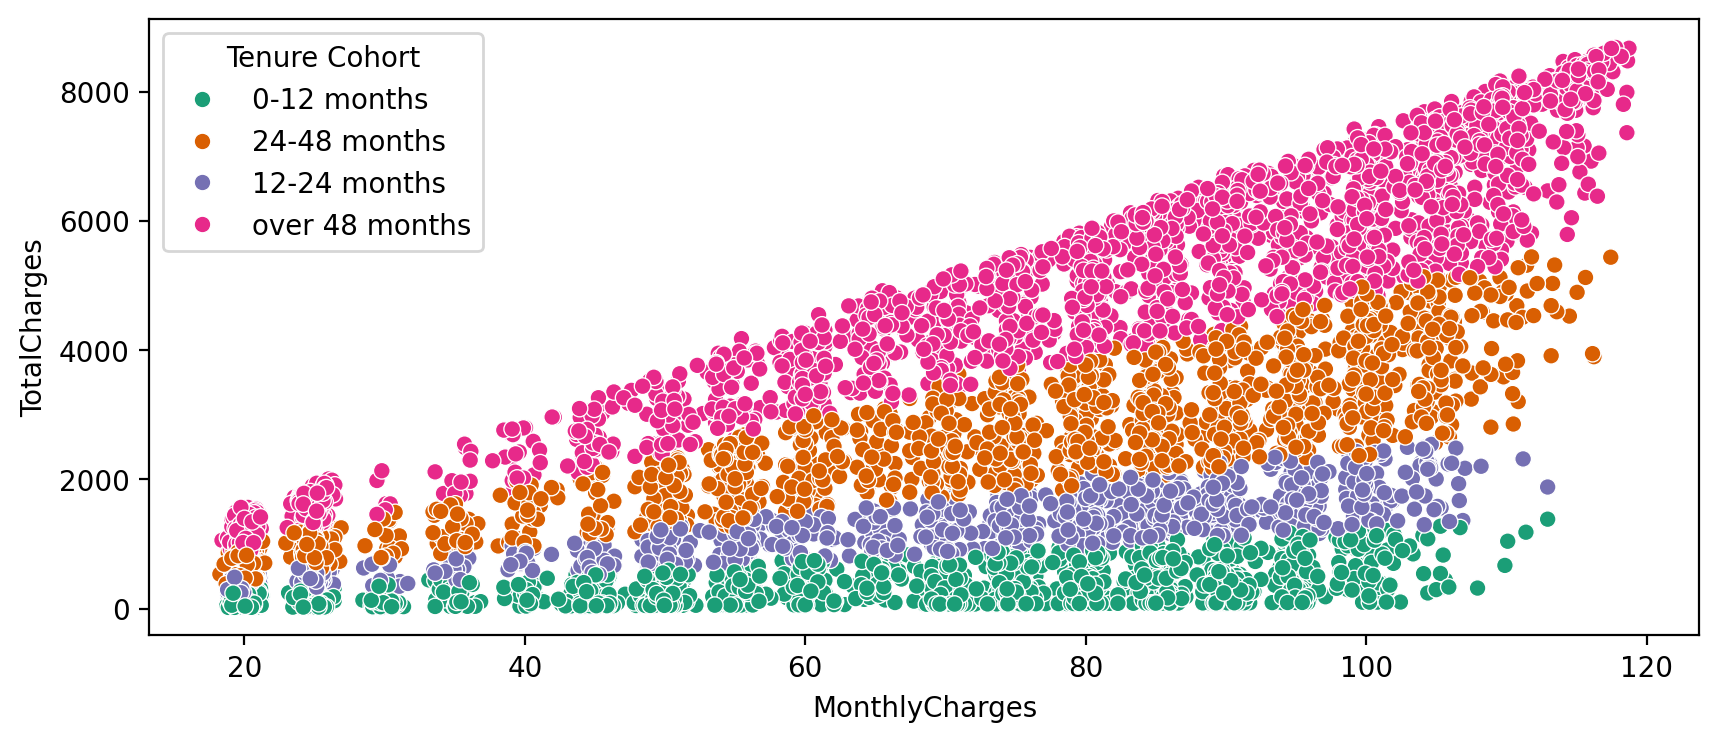

In [29]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort', palette='Dark2')
plt.show();

**TASK: Create a count plot showing the churn count per cohort.**

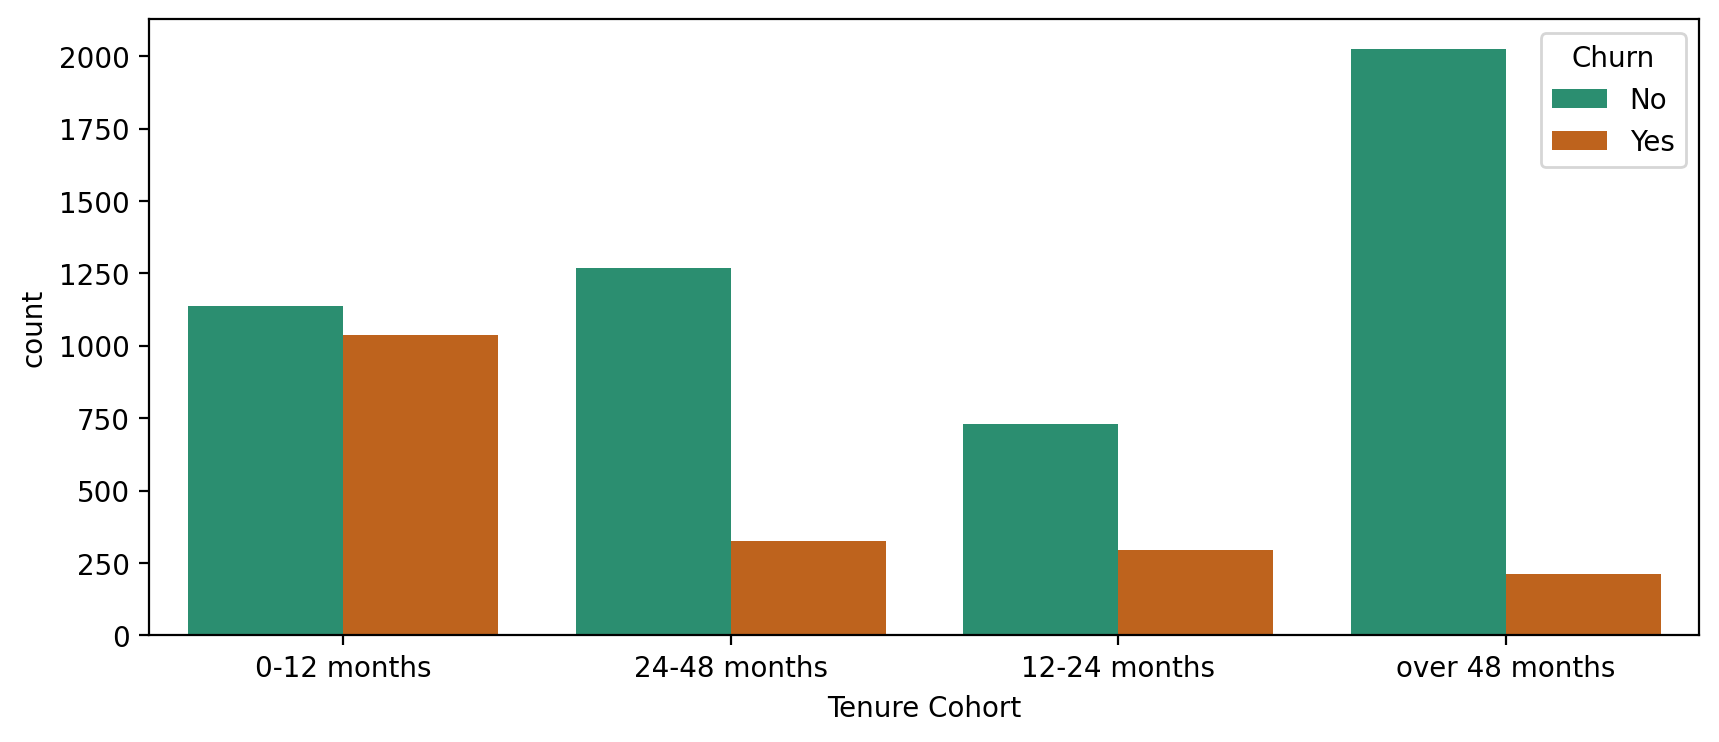

In [30]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df, x='Tenure Cohort', hue='Churn', palette='Dark2')
plt.show();

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

<Figure size 2000x800 with 0 Axes>

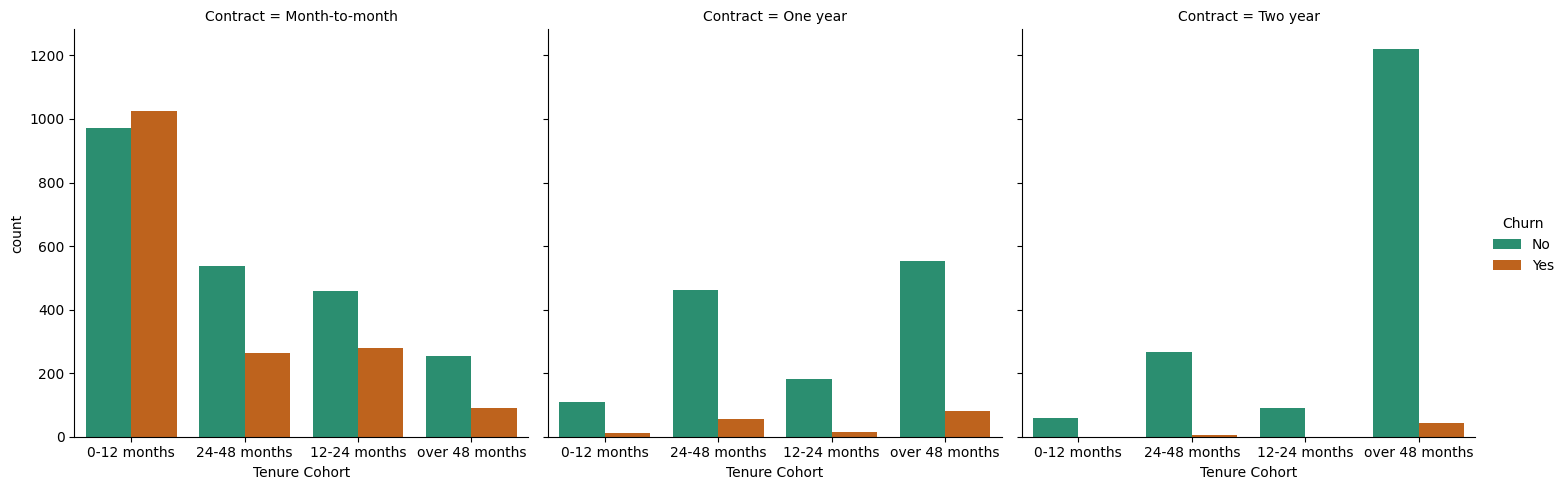

In [31]:
plt.figure(figsize=(10,4), dpi=200)
sns.catplot(data=df, x='Tenure Cohort', col='Contract', hue='Churn', kind='count', palette='Dark2')
plt.show();

# Predictive Modeling



## Decision Tree

In [32]:
X = df.drop(columns=['Churn','customerID'], axis=1)
X = pd.get_dummies(X, dtype=int)
y = df['Churn']

### Basic

Accuracy: 0.8053977272727273

Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.54      0.50      0.52       147

    accuracy                           0.81       704
   macro avg       0.70      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



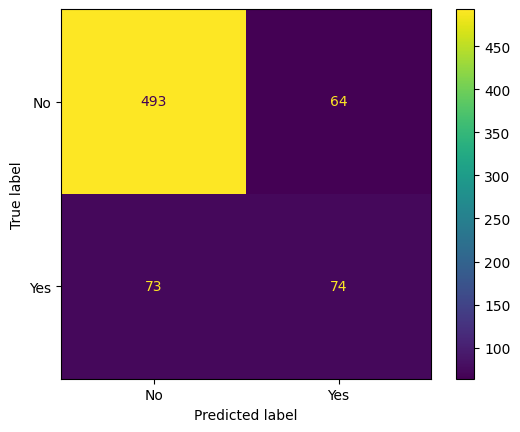

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train,y_train)
preds = dt.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f'\nClassification Report:\n{classification_report(y_test, preds)}')

ConfusionMatrixDisplay.from_estimator(dt,X_test,y_test)

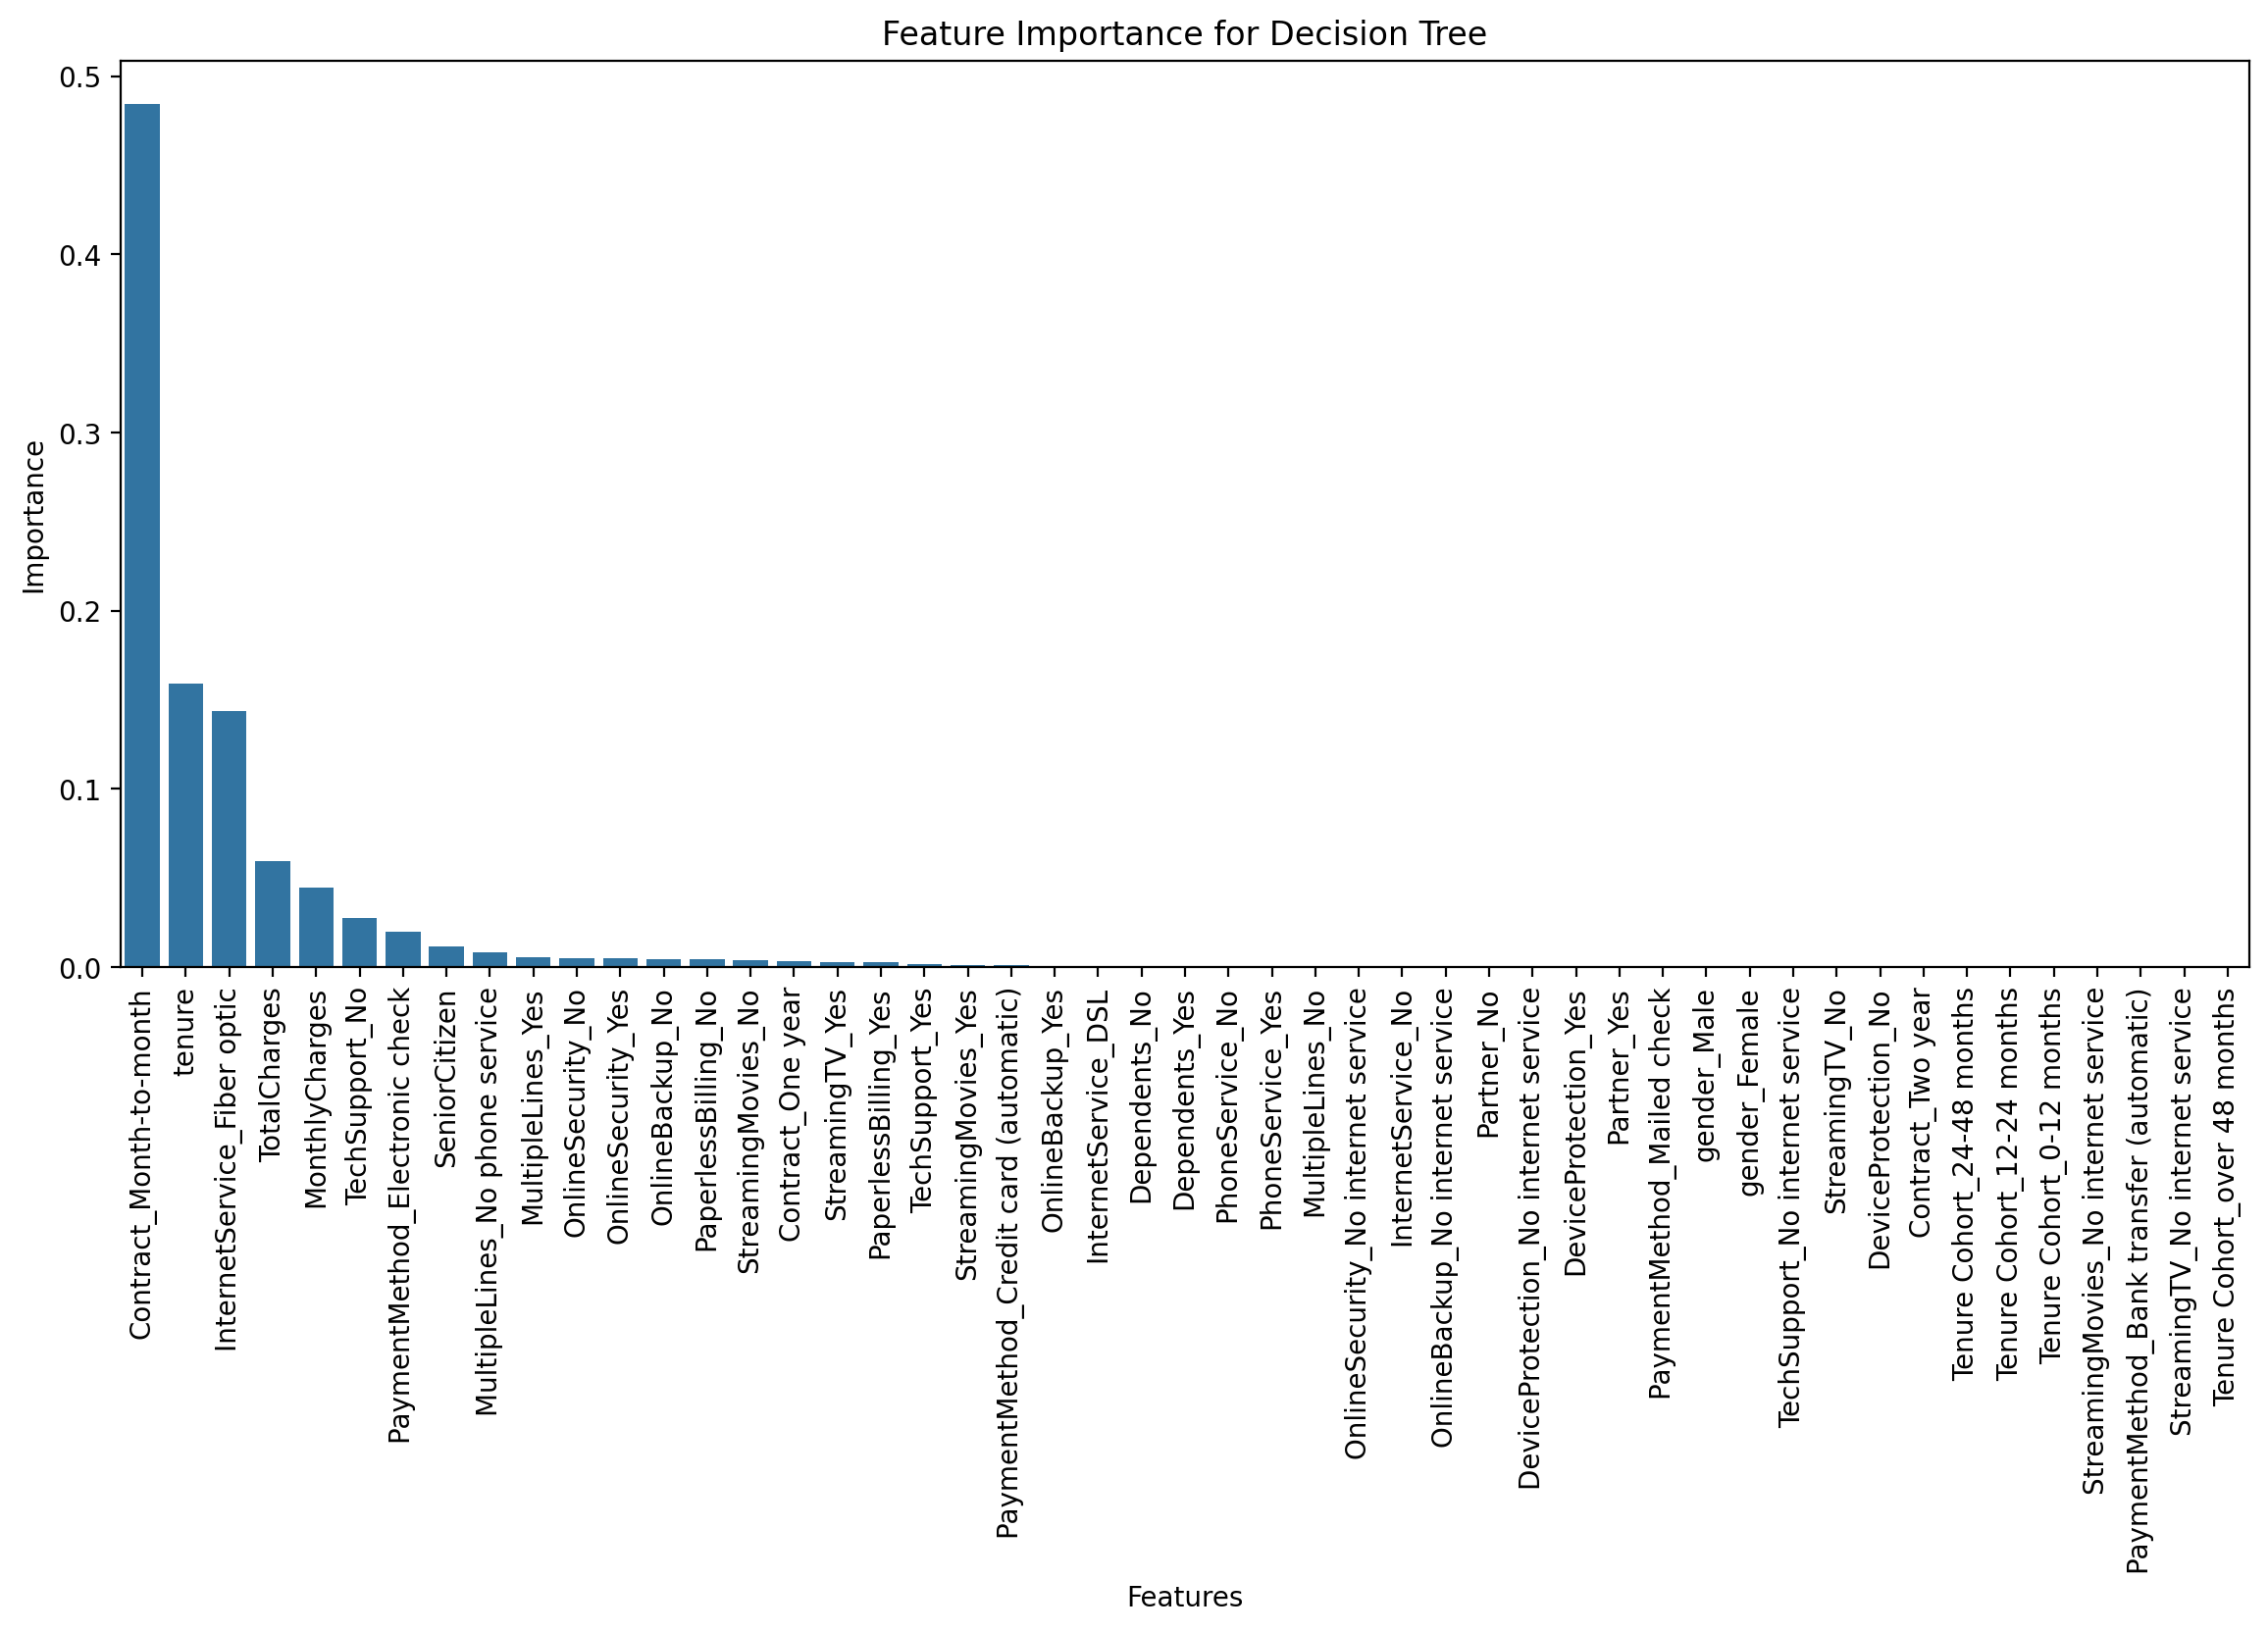

In [34]:
imp_feats_dt = pd.DataFrame(data=dt.feature_importances_,
                         index=X.columns,
                         columns=['Feature Importance']).sort_values("Feature Importance",ascending=False)

plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats_dt.sort_values('Feature Importance',ascending=False),
            x=imp_feats_dt.sort_values('Feature Importance', ascending=False).index,
            y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show();

### GridSearchCV DT

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Estimator: DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=101)
Accuracy: 0.7940340909090909

Classification Report:
              precision    recall  f1-score   support

          No       0.84      0.90      0.86       517
         Yes       0.64      0.51      0.57       187

    accuracy                           0.79       704
   macro avg       0.74      0.70      0.72       704
weighted avg       0.78      0.79      0.79       704



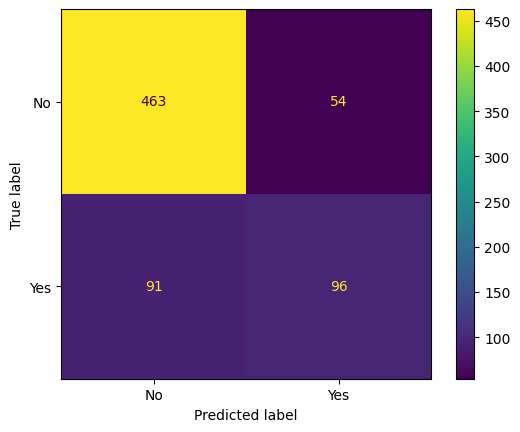

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101, stratify=y)

# Define model
dt_g = DecisionTreeClassifier(random_state=101)

# paramter grid GridSearchCV
param_grid = {
    'max_depth': list(range(1,11)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']}

# Initialize GridSearchCV
grid_dt = GridSearchCV(estimator=dt_g,
                       param_grid=param_grid,
                       cv=5, scoring='accuracy', n_jobs=-1, verbose=1)


# Fit GridSearchCV
grid_dt.fit(X_train, y_train)

# Best estimator and parameters
best_dt = grid_dt.best_estimator_
best_params = grid_dt.best_params_

print(f"Best Estimator: {best_dt}")

# Prediction
y_pred_g_dt = best_dt.predict(X_test)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred_g_dt)}")
print(f'\nClassification Report:\n{classification_report(y_test, y_pred_g_dt)}')

ConfusionMatrixDisplay.from_estimator(best_dt, X_test,y_test)

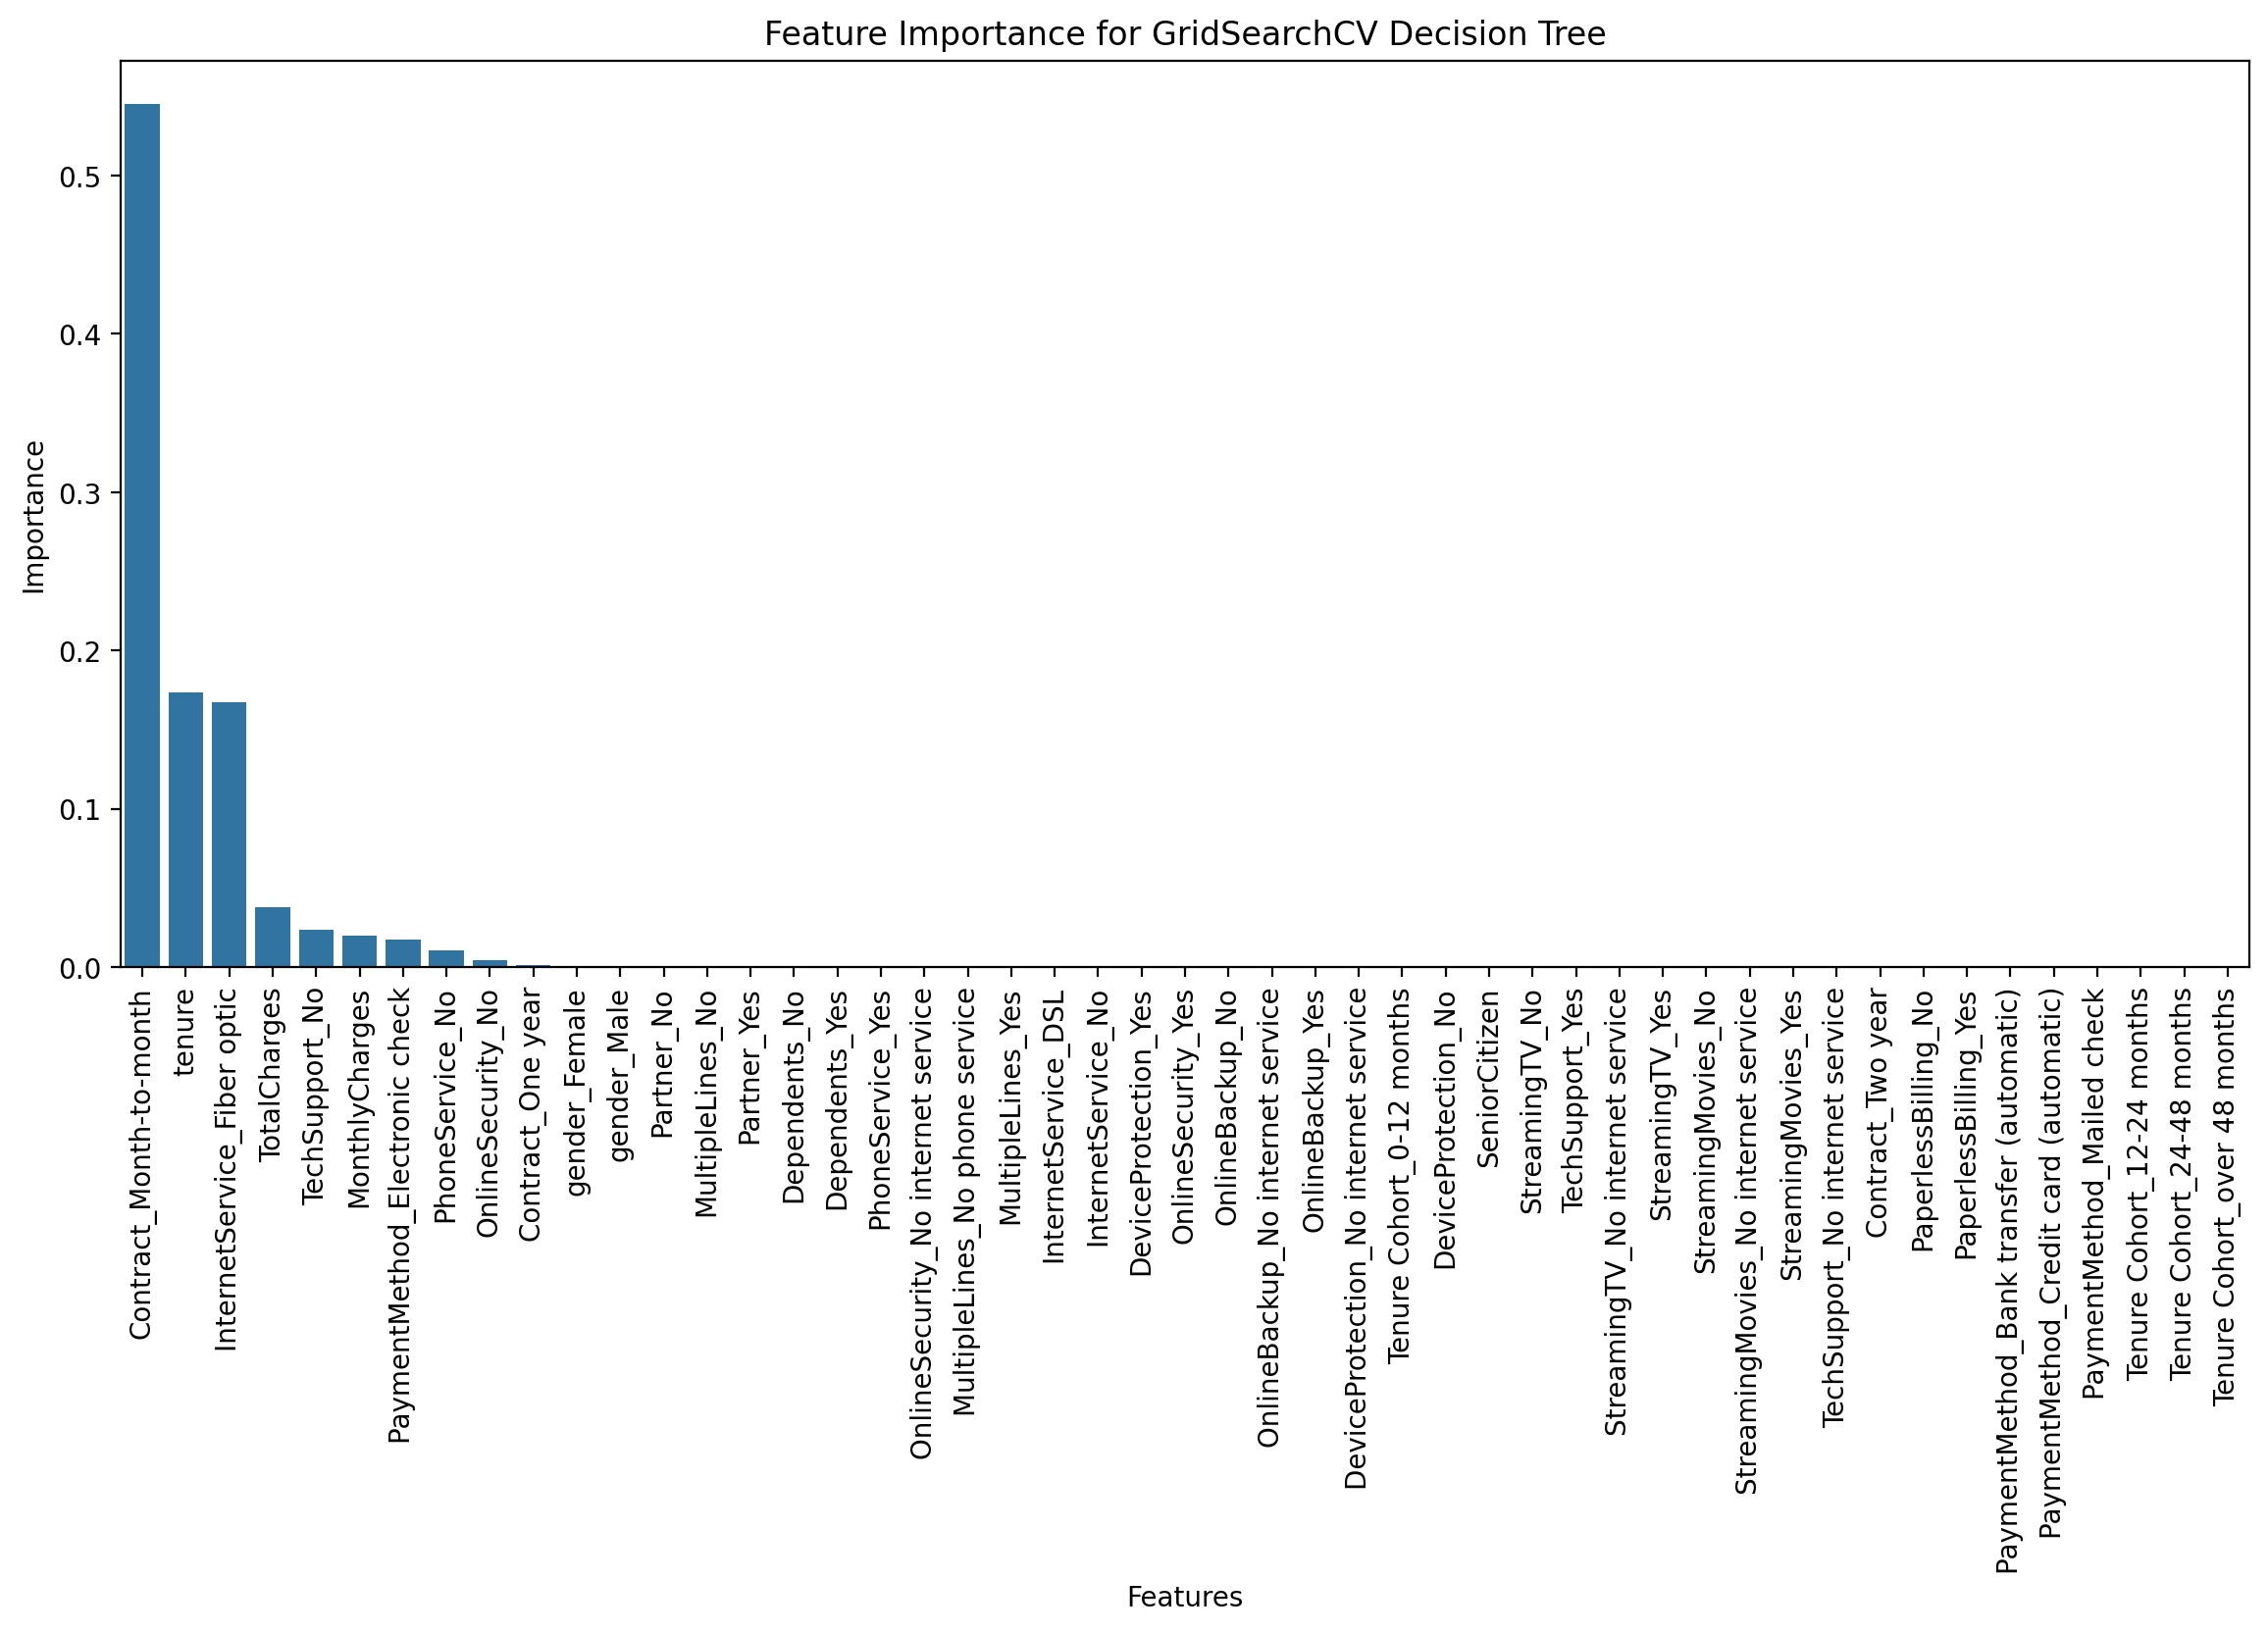

In [36]:
imp_feats_g_dt = pd.DataFrame(data=best_dt.feature_importances_,
                         index=X.columns,
                         columns=['Feature Importance']).sort_values("Feature Importance",ascending=False)

plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats_g_dt.sort_values('Feature Importance',ascending=False),
            x=imp_feats_g_dt.sort_values('Feature Importance', ascending=False).index,
            y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for GridSearchCV Decision Tree")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show();

## Random Forest



### Basic

Accuracy: 0.7798295454545454

Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.87      0.86       557
         Yes       0.47      0.44      0.46       147

    accuracy                           0.78       704
   macro avg       0.66      0.66      0.66       704
weighted avg       0.77      0.78      0.78       704



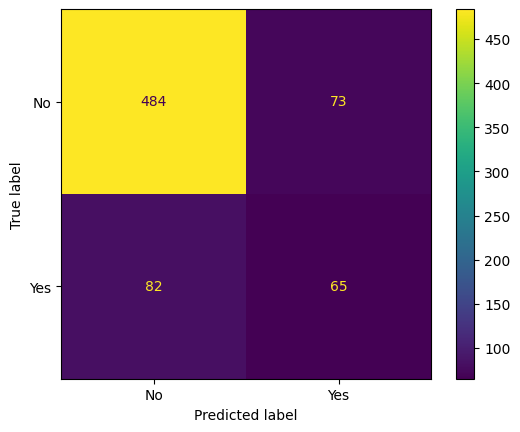

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

rf = RandomForestClassifier(n_estimators=100, random_state=101)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f'\nClassification Report:\n{classification_report(y_test, y_pred_rf)}')

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

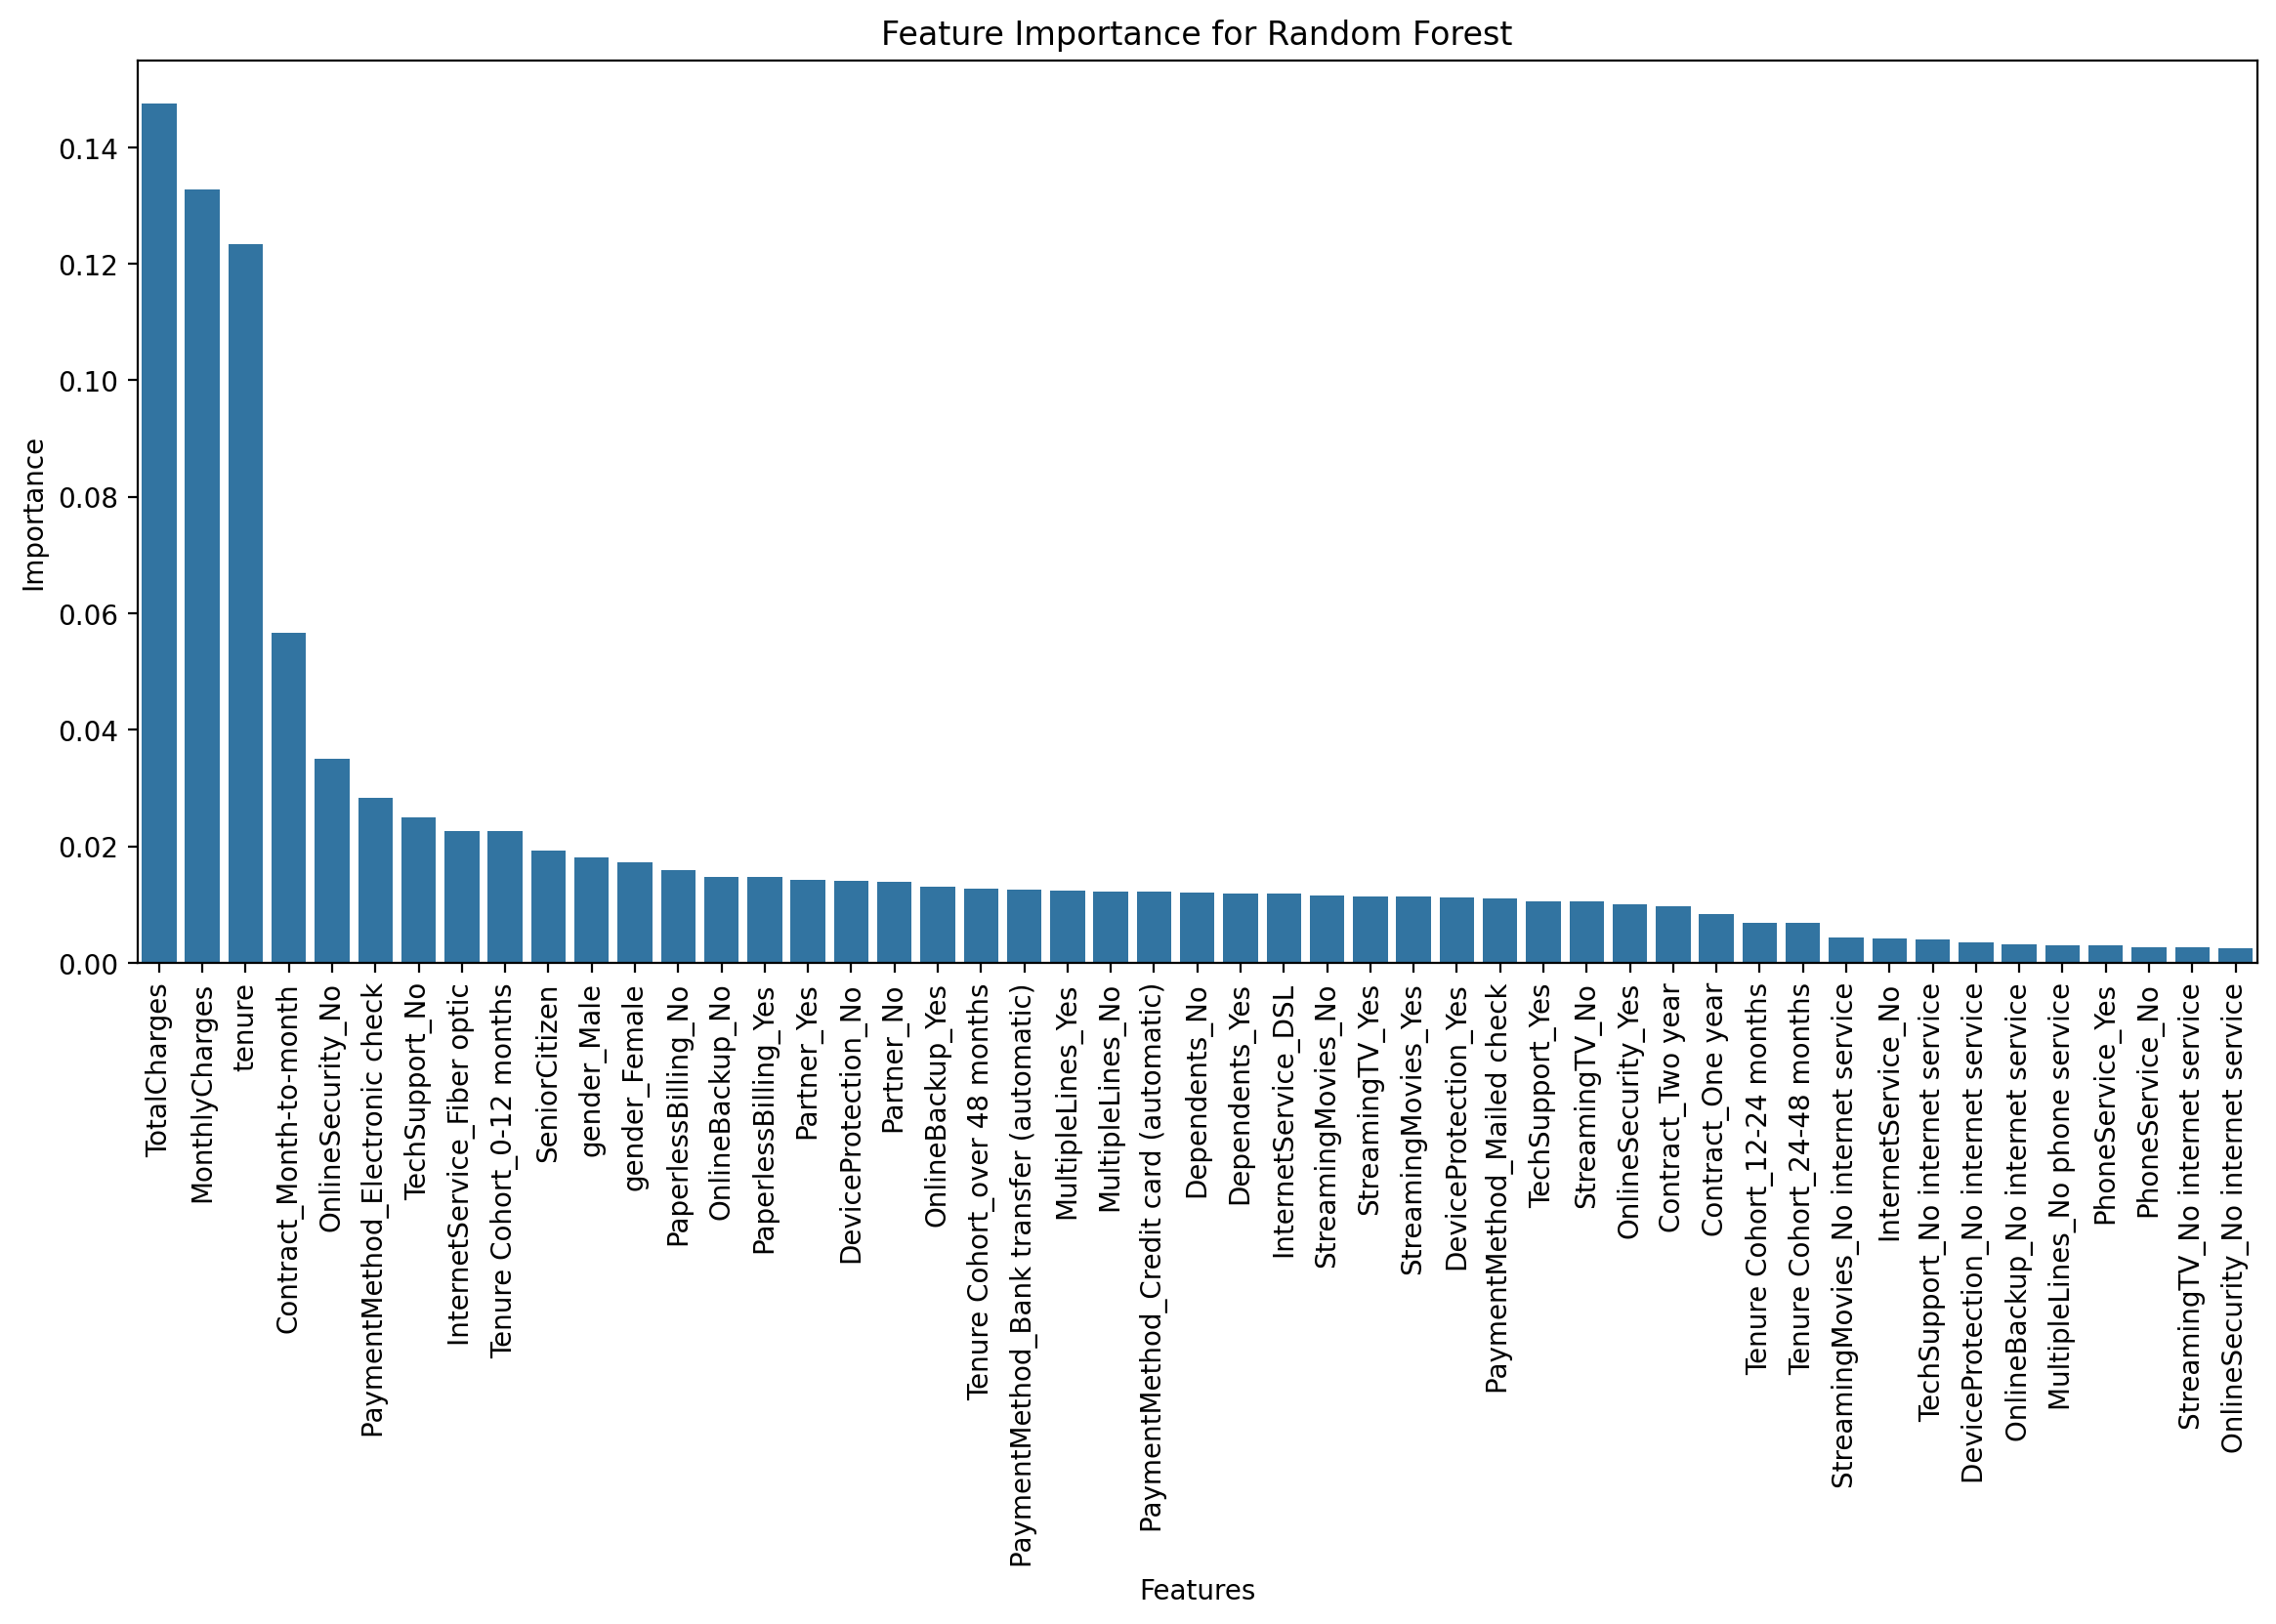

In [38]:
imp_feats_rf = pd.DataFrame(data=rf.feature_importances_,
                         index=X.columns,
                         columns=['Feature Importance']).sort_values("Feature Importance",ascending=False)


plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats_rf.sort_values('Feature Importance',ascending=False),
            x=imp_feats_rf.sort_values('Feature Importance', ascending=False).index,
            y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Random Forest")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show();

### RandomizedSeaerchCV RF

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Estimator: RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=101)
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}

Test Accuracy: 0.8097

Classification Report:
              precision    recall  f1-score   support

          No       0.83      0.93      0.88       517
         Yes       0.71      0.49      0.58       187

    accuracy                           0.81       704
   macro avg       0.77      0.71      0.73       704
weighted avg       0.80      0.81      0.80       704



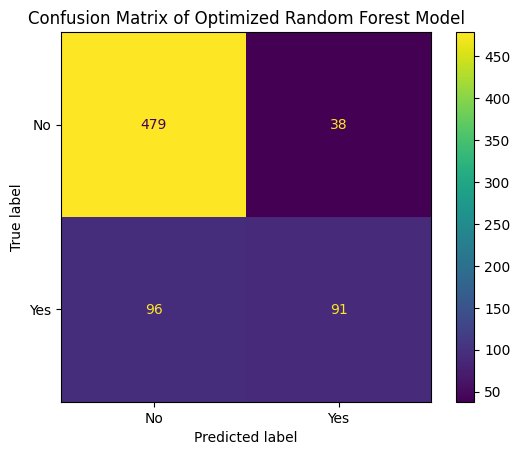

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101, stratify=y)

# Initialize the Random Forest Classifier
rf_r = RandomForestClassifier(random_state=101)

# Define the parameter grid for Randomized Search
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],      # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],        # Minimum samples required at each leaf node
    'bootstrap': [True, False]            # Whether bootstrap samples are used when building trees
}

'''GridSearchCV can be time consuming and computational extensive for RF with high dimensional'''
# Using RandomizedSearchCV for faster hyperparameter tuning
random_rf = RandomizedSearchCV(estimator=rf_r,
                               param_distributions=param_grid,
                               n_iter=50,  # Limit to 50 combinations for efficiency
                               cv=5, scoring='accuracy', n_jobs=-1,
                               random_state=101,verbose=1)

# Fit the Randomized Search
random_rf.fit(X_train, y_train)

# Retrieve the best estimator and parameters
best_rf = random_rf.best_estimator_
best_params = random_rf.best_params_
print(f"Best Estimator: {best_rf}")
print(f"Best Parameters: {best_params}")

# Prediction on the test set using the best model
y_pred_rf = best_rf.predict(X_test)

# Model Evaluation
print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f'\nClassification Report:\n{classification_report(y_test, y_pred_rf)}')

# Confusion Matrix Display
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test)
plt.title("Confusion Matrix of Optimized Random Forest Model")
plt.show()

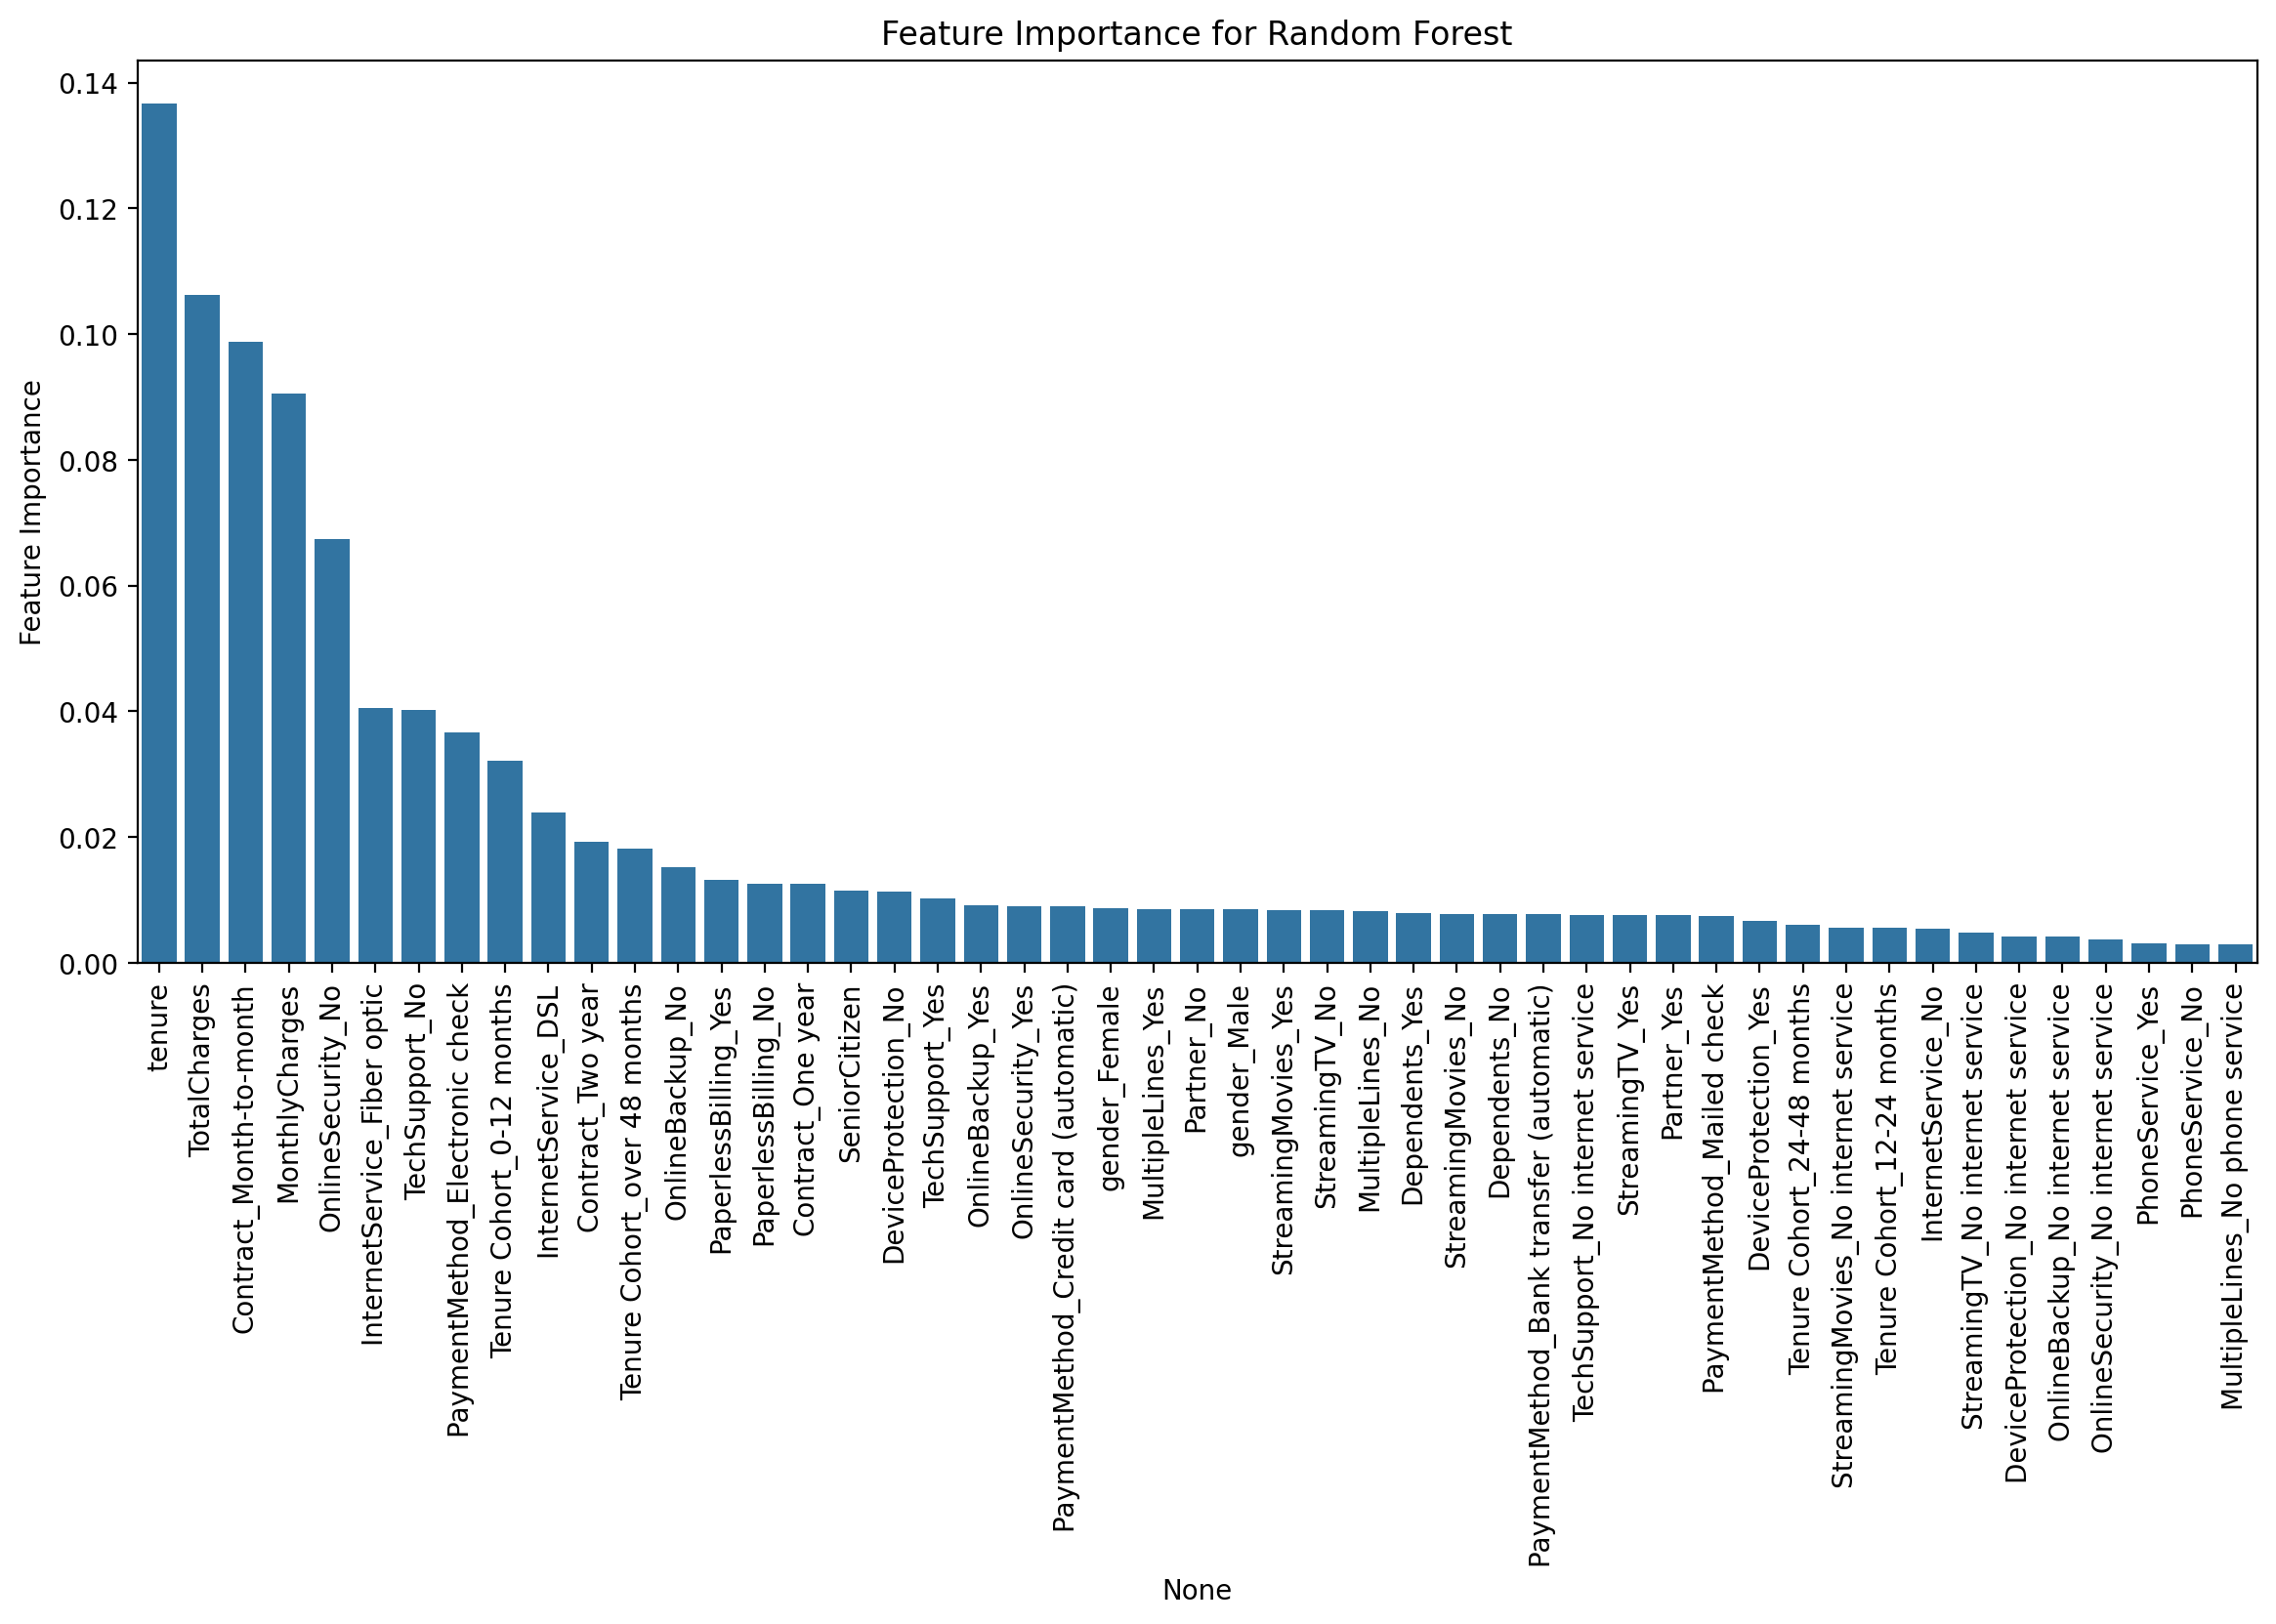

In [40]:
imp_feats_r_rf = pd.DataFrame(data=best_rf.feature_importances_,
                         index=X.columns,
                         columns=['Feature Importance']).sort_values("Feature Importance",ascending=False)


plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats_r_rf.sort_values('Feature Importance',ascending=False),
            x=imp_feats_r_rf.sort_values('Feature Importance', ascending=False).index,
            y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Random Forest");


## AdaBoost


### Basic

Accuracy: 0.8267045454545454

Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.91      0.89       557
         Yes       0.60      0.52      0.56       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.82       704



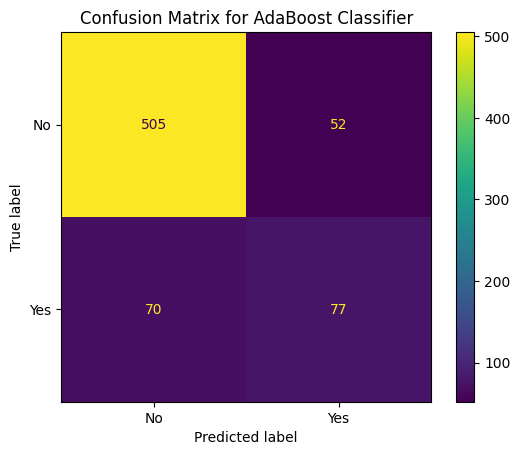

In [41]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Initialize AdaBoost with specified algorithm to avoid warning
ada = AdaBoostClassifier(algorithm='SAMME')
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada)}")
print(f'\nClassification Report:\n{classification_report(y_test, y_pred_ada)}')

# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(ada, X_test, y_test)
plt.title("Confusion Matrix for AdaBoost Classifier")
plt.show()


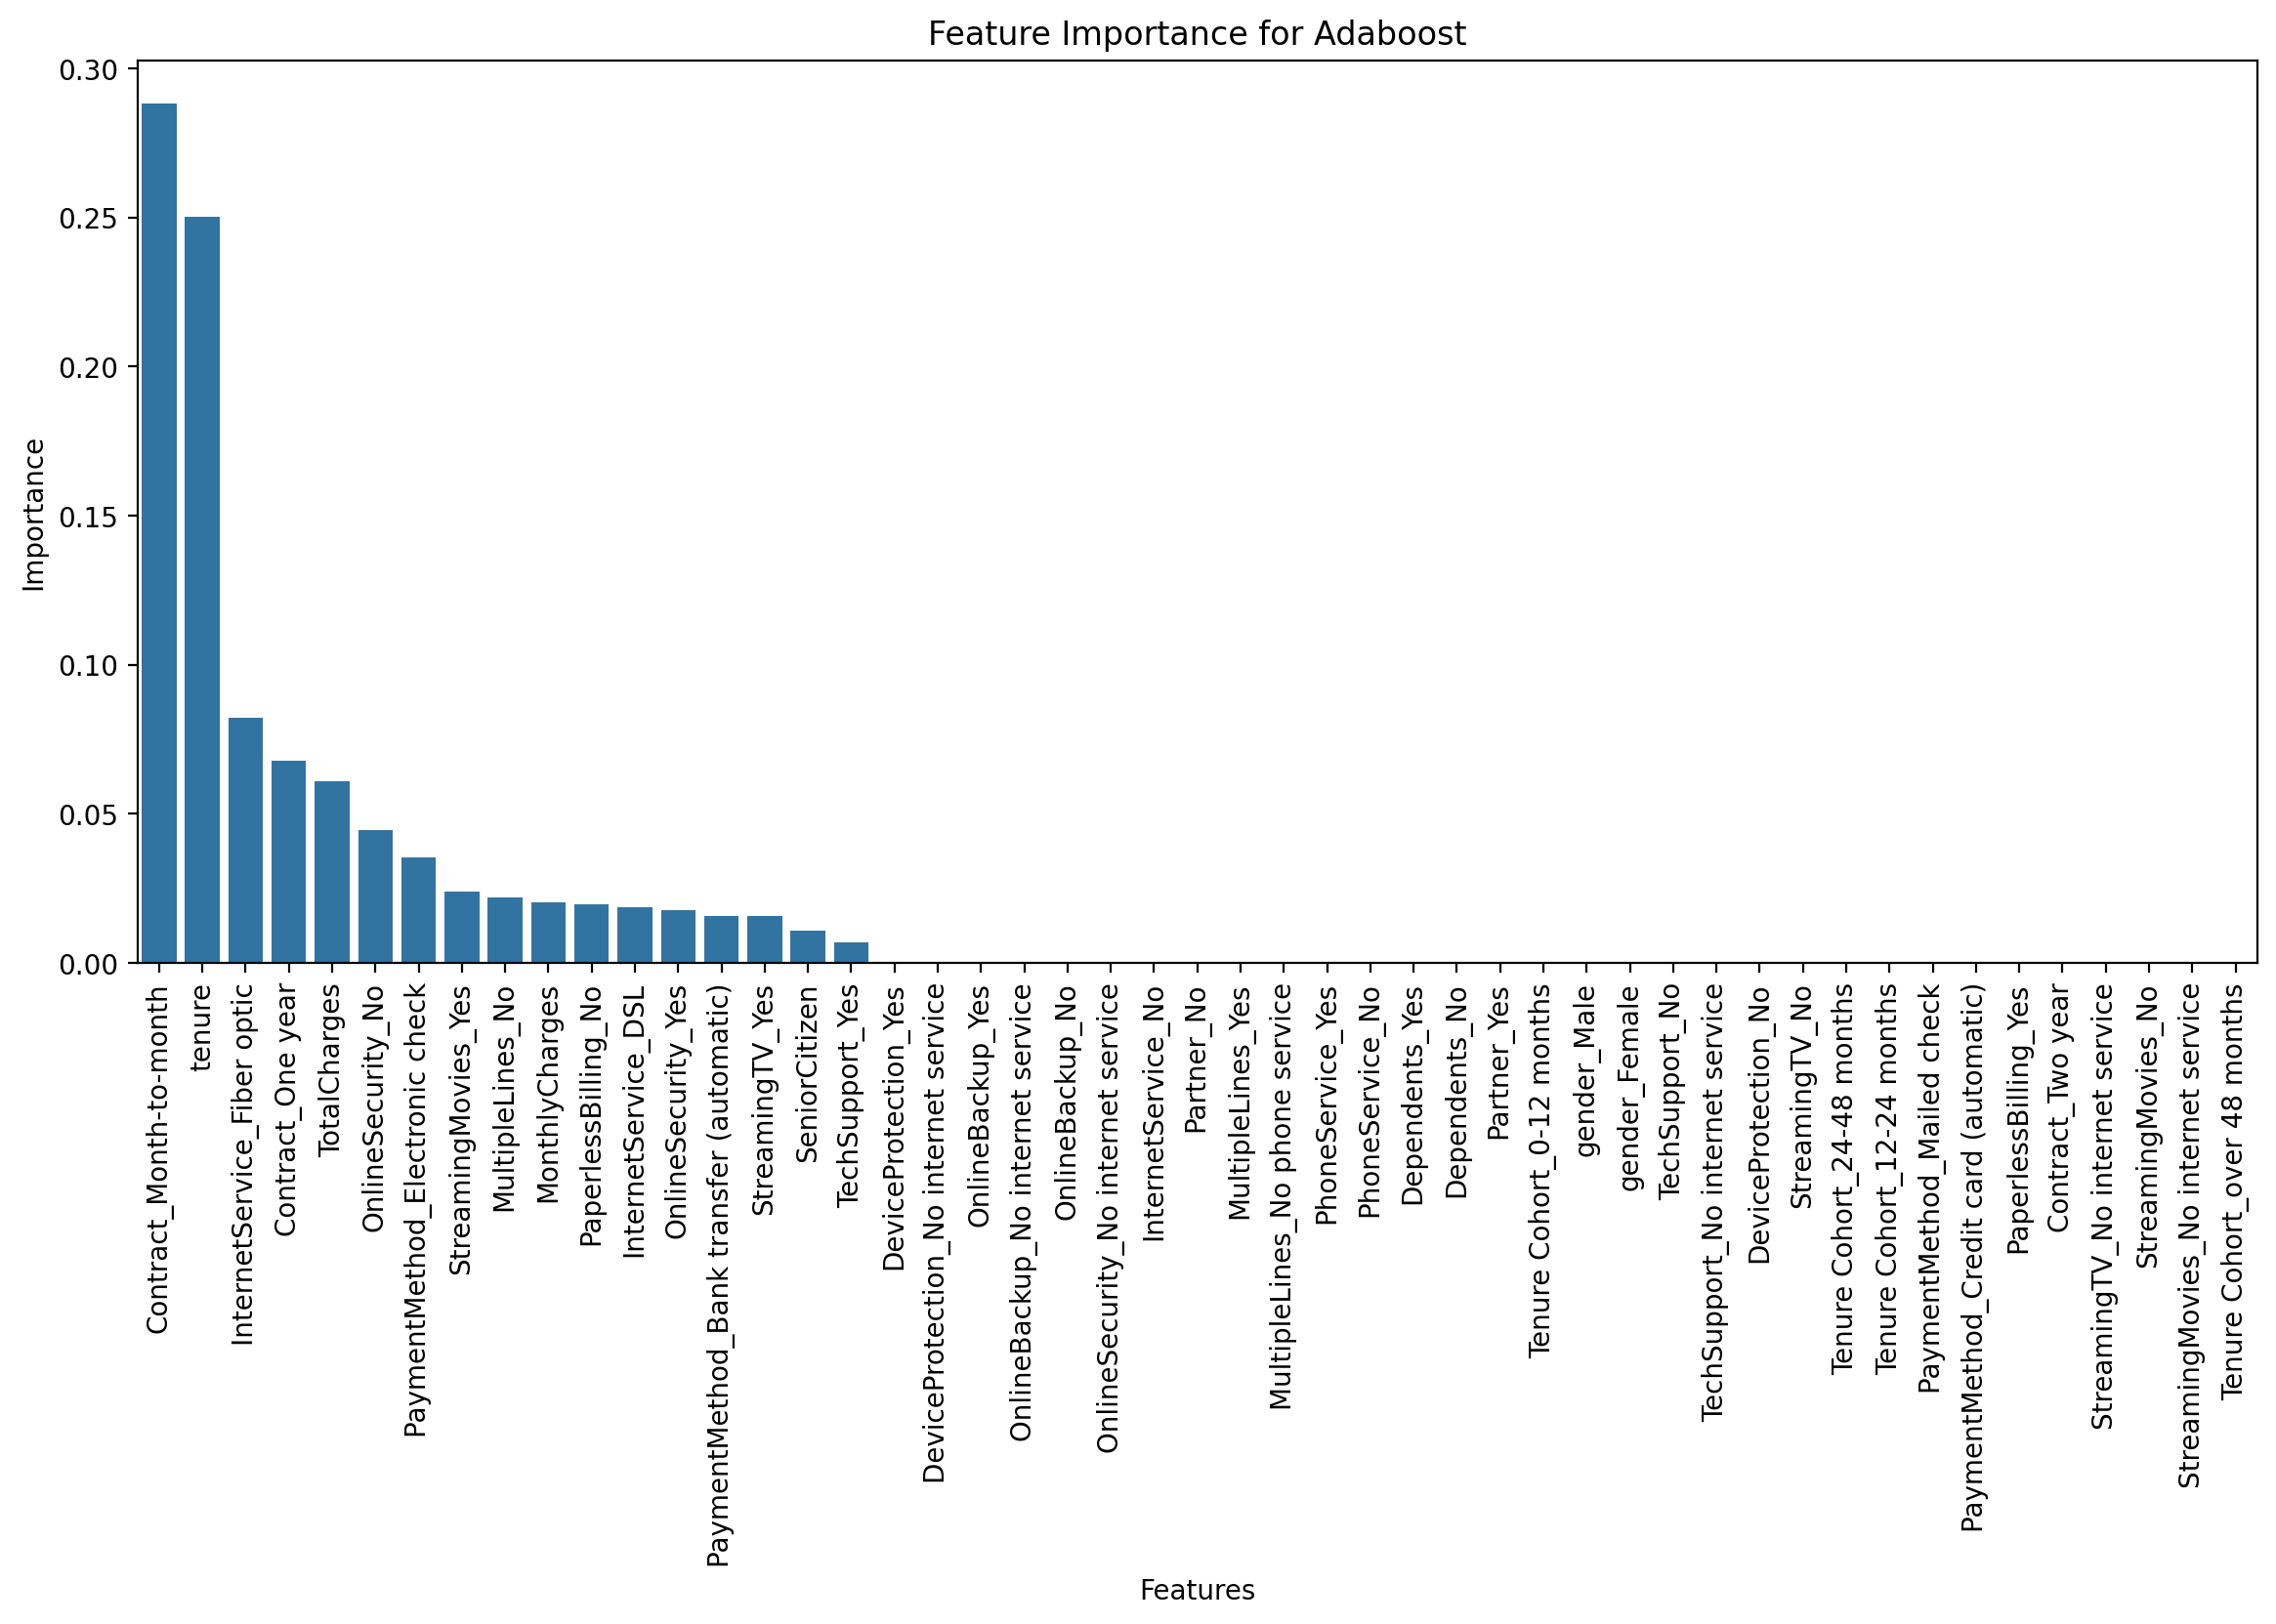

In [42]:
imp_feats_ada = pd.DataFrame(data=ada.feature_importances_,
                         index=X.columns,
                         columns=['Feature Importance']).sort_values("Feature Importance",ascending=False)


plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats_ada.sort_values('Feature Importance',ascending=False),
            x=imp_feats_ada.sort_values('Feature Importance', ascending=False).index,
            y='Feature Importance')

plt.xticks(rotation=90)
plt.title("Feature Importance for Adaboost")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show();

## Gradient Boost

### Basic

Initial Model Evaluation
Accuracy: 0.8182

Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.54       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



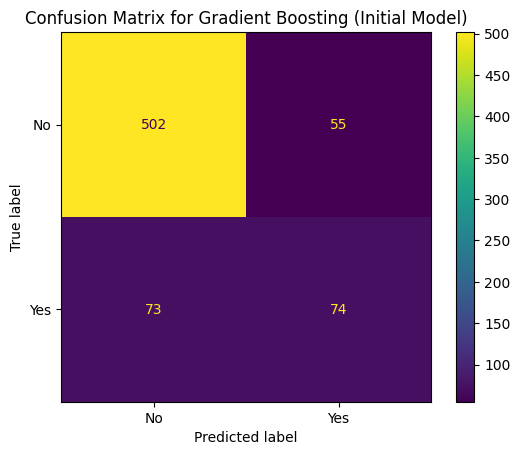

In [43]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Initialize the GradientBoostingClassifier with basic parameters
gb = GradientBoostingClassifier(random_state=101)
gb.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb.predict(X_test)

# Evaluation of initial model
print("Initial Model Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred_gb)}")

# Confusion Matrix Display
ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test)
plt.title("Confusion Matrix for Gradient Boosting (Initial Model)")
plt.show()

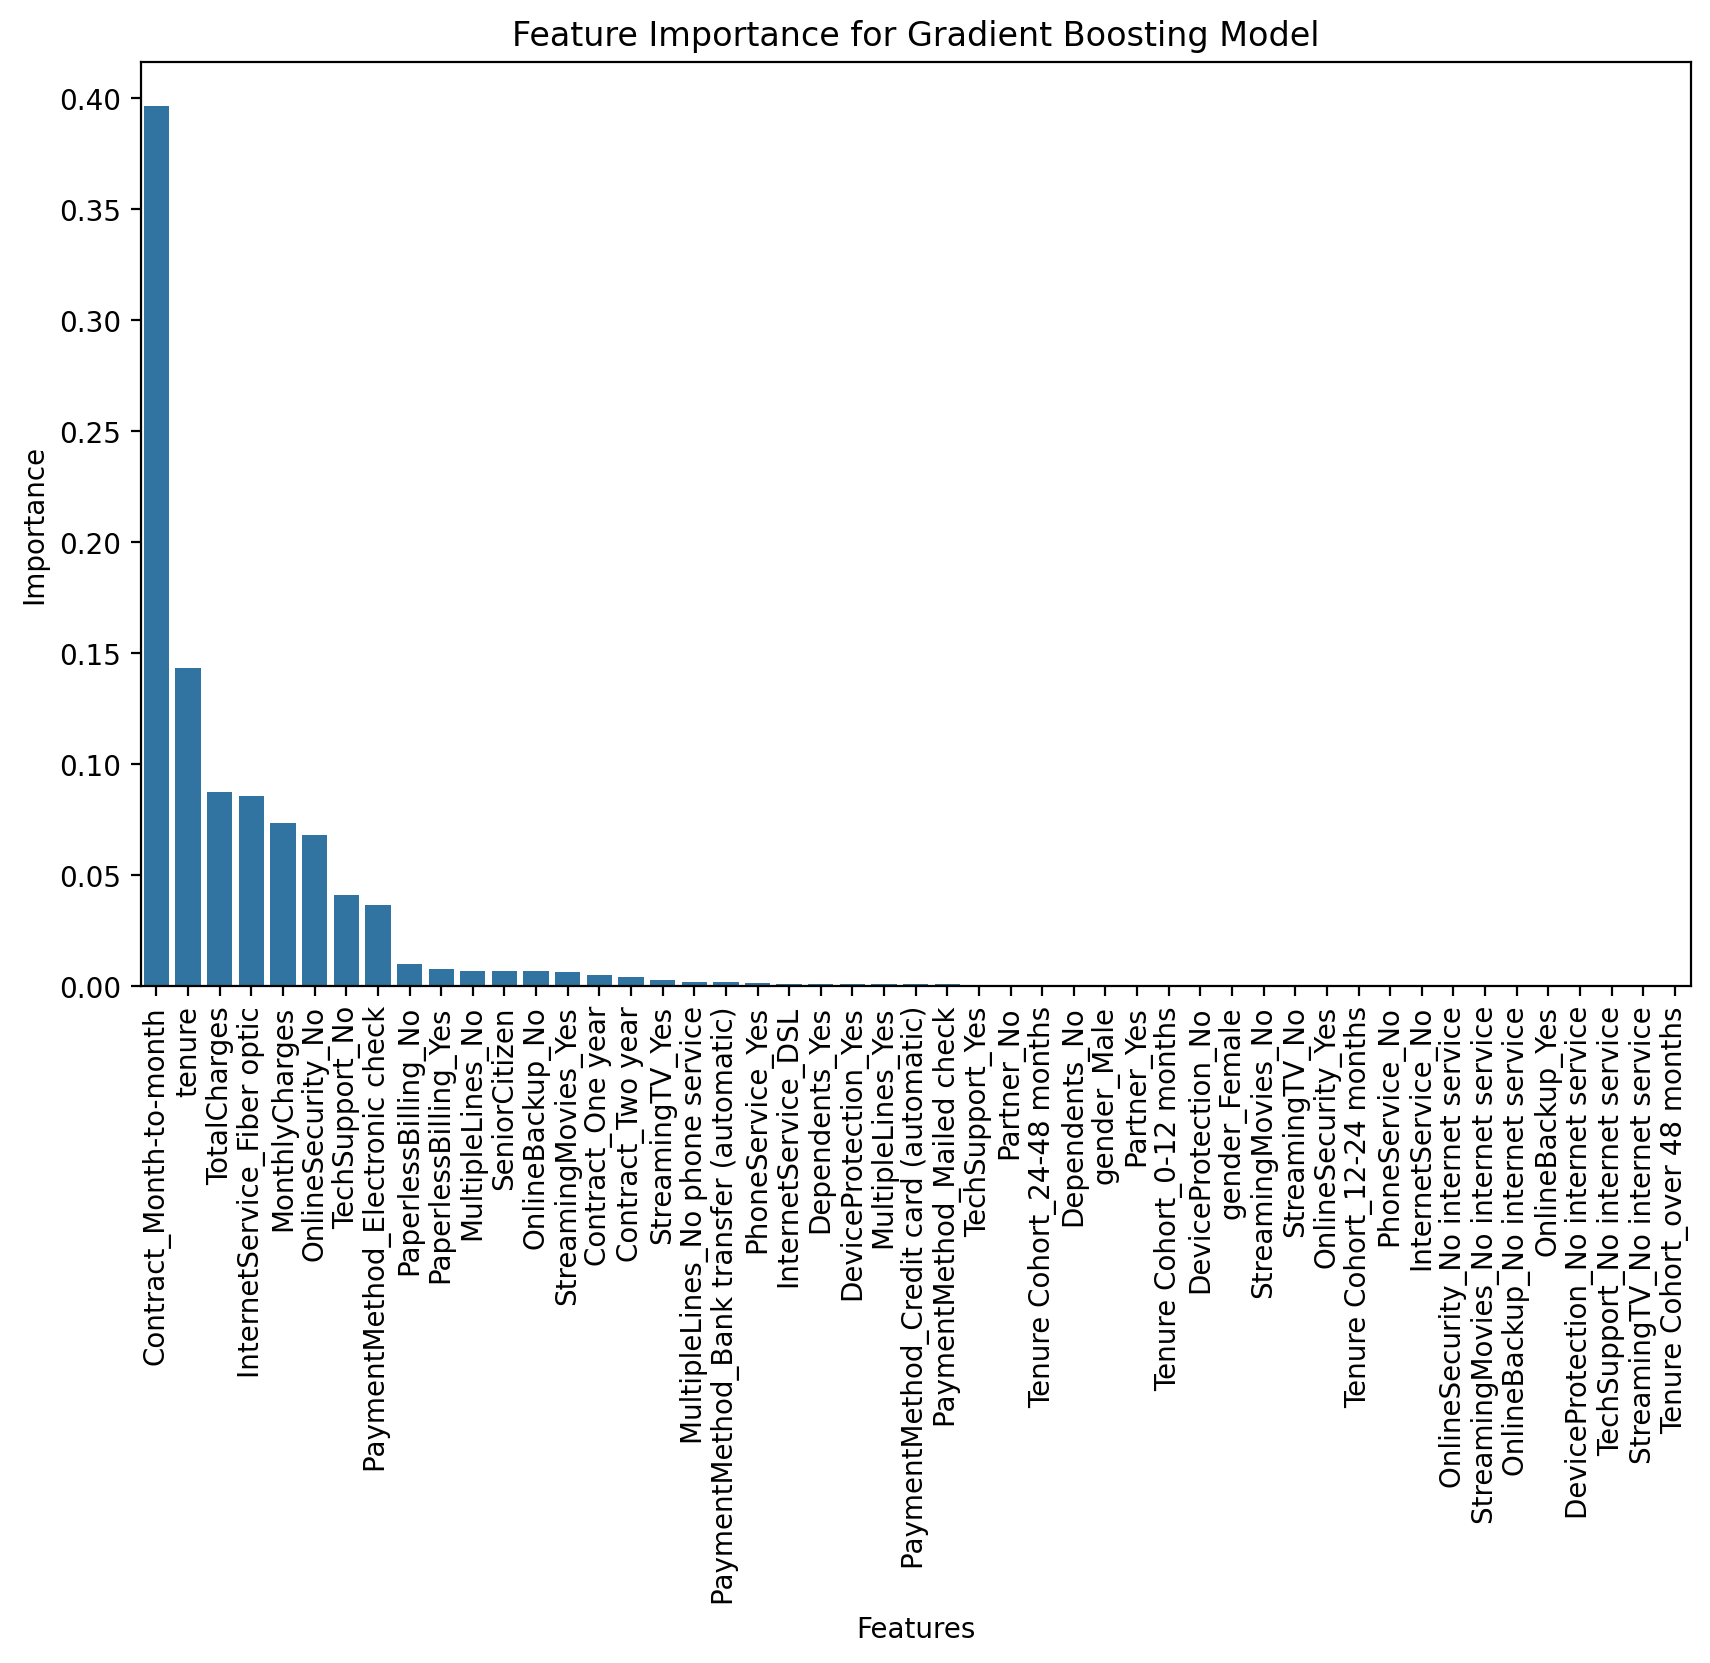

In [45]:
# Feature Importance Plot
imp_feats_gb = pd.DataFrame(data=gb.feature_importances_,
                                   index=X.columns,
                                   columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)

# Plot Feature Importances
plt.figure(figsize=(10, 6),dpi=200)

sns.barplot(data=imp_feats_gb.sort_values('Feature Importance',ascending=False),
            x=imp_feats_gb.sort_values('Feature Importance', ascending=False).index,
            y='Feature Importance')

plt.xticks(rotation=90)
plt.title("Feature Importance for Gradient Boosting Model")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show();



### GridSearchCV GB

In [ ]:
# # Import necessary libraries
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt


# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# # Initialize the GradientBoostingClassifier with basic parameters
# gb_r = GradientBoostingClassifier(random_state=101)

# # Hyperparameter Tuning with GridSearchCV
# param_dist = {
#     'n_estimators': [50, 100, 200],           # Number of boosting stages
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],        # Step size shrinkage
#     'max_depth': [3, 4, 5],                   # Max depth of the individual estimators
#     'min_samples_split': [2, 5, 10],          # Minimum number of samples to split a node
#     'min_samples_leaf': [1, 2, 4]             # Minimum number of samples in a leaf node
# }

# '''# GridSearchCV for GBC can time consuming and computational extensive
# grid_gb = GridSearchCV(estimator=gb_g,
#                            param_grid=param_grid,
#                            cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
# '''
# random_gb = RandomizedSearchCV(gb_r,
#                                    param_distributions=param_dist,
#                                    n_iter=50,  # Test only 50 random combinations
#                                    cv=5,
#                                    scoring='accuracy',
#                                    n_jobs=-1,
#                                    random_state=101,
#                                    verbose=1)

# # Fit Random Search
# random_gb.fit(X_train, y_train, early_stopping_rounds=10, validation_fraction=0.1, n_iter_no_change=10)

# # Retrieve the best model and parameters
# best_gb = random_gb.best_estimator_
# best_params = random_gb.best_params_
# print(f"Best Parameters: {best_params}")

# # Evaluate the optimized model
# y_pred_best_g_gb = best_gb.predict(X_test)

# print("\nOptimized Model Evaluation")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_best_g_gb):.4f}")
# print(f'\nClassification Report:\n{classification_report(y_test, y_pred_best_g_gb)}')

# # Confusion Matrix for the optimized model
# ConfusionMatrixDisplay.from_estimator(best_gb, X_test, y_test)
# plt.title("Confusion Matrix for Optimized Gradient Boosting Model")
# plt.show()

In [ ]:
# # Feature Importance Plot
# imp_feats_g_gb = pd.DataFrame(data=best_gb.feature_importances_,
#                                    index=X.columns,
#                                    columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)

# # Plot Feature Importances
# plt.figure(figsize=(10, 6))
# plt.barh(imp_feats_g_gb.index, imp_feats_g_gb['Feature Importance'], color='teal')
# plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
# plt.title("Feature Importance for Gradient Boosting Model")
# plt.xlabel("Feature Importance")
# plt.show()


## XGBoost

### Basic

### RandomizedSearch + GridSearchCV + XGB

In [46]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score

# convert y into numeric
y2 = y.copy()
y2 = pd.get_dummies(y2, dtype=int, drop_first=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.1, random_state=42, stratify=y)

# Train a basic XGBoost model
baseline_model = xgb.XGBClassifier()
baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)

# Baseline accuracy
baseline_accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")


param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 7, 10],           # Maximum tree depth
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size
    'subsample': [0.6, 0.8, 1.0],         # Percentage of samples used per tree
    'colsample_bytree': [0.3, 0.5, 0.7, 1.0]  # Fraction of features per tree
}

# Set up RandomizedSearchCV
xgb_model = xgb.XGBClassifier()
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of combinations to try
    scoring='accuracy',
    cv=3,  # Cross-validation folds
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the random search model
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Use the best parameters from the random search to narrow the grid
fine_tuned_param_grid = {
    'n_estimators': [random_search.best_params_['n_estimators'] - 10, random_search.best_params_['n_estimators']],
    'max_depth': [random_search.best_params_['max_depth'] - 1, random_search.best_params_['max_depth']],
    'learning_rate': [random_search.best_params_['learning_rate'], random_search.best_params_['learning_rate'] * 1.1],
    'subsample': [random_search.best_params_['subsample'], min(1, random_search.best_params_['subsample'] + 0.1)],
    'colsample_bytree': [random_search.best_params_['colsample_bytree'], min(1, random_search.best_params_['colsample_bytree'] + 0.1)]
}

# Conduct a Grid Search with the refined parameters
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=fine_tuned_param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)
print("Fine-Tuned Best Parameters:", grid_search.best_params_)
print("Fine-Tuned Best Score:", grid_search.best_score_)

# Train a final model with the best parameters
final_model = xgb.XGBClassifier(**grid_search.best_params_)
final_model.fit(X_train, y_train)

# Predict and evaluate
final_preds = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_preds)
print(f"Final Model Accuracy: {final_accuracy:.2f}")


Baseline Accuracy: 0.76
Best Parameters: {'subsample': 1.0, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
Best Score: 0.8073648105576267
Fine-Tuned Best Parameters: {'colsample_bytree': 0.7999999999999999, 'learning_rate': 0.11000000000000001, 'max_depth': 2, 'n_estimators': 50, 'subsample': 1.0}
Fine-Tuned Best Score: 0.8079970966226891
Final Model Accuracy: 0.78


## CatBoost

In [ ]:
!pip install catboost

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from catboost import CatBoostClassifier, Pool

# convert y into numeric
y2 = y.copy()
y2 = pd.get_dummies(y2, dtype=int, drop_first=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.1, random_state=42)

# Create Pool
train_data = Pool(data=X_train, label=y_train)
test_data = Pool(data=X_test, label=y_test)

# Initialize and train the CatBoost model
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    verbose=False
)

model.fit(train_data)

# Make predictions
preds_class = model.predict(test_data)

# Evaluate the model
accuracy = accuracy_score(y_test, preds_class)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, preds_class, target_names=['Yes','No']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, preds_class))


Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

         Yes       0.82      0.91      0.87       511
          No       0.67      0.48      0.56       193

    accuracy                           0.79       704
   macro avg       0.75      0.70      0.71       704
weighted avg       0.78      0.79      0.78       704


Confusion Matrix:
[[466  45]
 [100  93]]


# Other testing

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.datasets import load_iris
# from sklearn.decomposition import PCA
# import pandas as pd

# # Load the Iris dataset
# iris = load_iris()
# X = iris.data  # Feature data
# y = iris.target  # Target labels

# # Perform PCA to reduce to two principal components
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)

# # Create a DataFrame for easy plotting
# df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
# df['Target'] = y

# # Plotting the score plot
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='PC1', y='PC2', hue='Target', data=df, palette='viridis', s=100, alpha=0.7)
# plt.title("PCA Score Plot of Iris Dataset")
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.legend(title="Target", loc='upper right')
# plt.show()


In [ ]:
# import itertools
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.datasets import load_iris
# from sklearn.feature_selection import f_classif

# # Load the Iris dataset
# iris = load_iris()
# X = iris.data
# y = iris.target
# feature_names = iris.feature_names

# # Create a DataFrame for easier manipulation
# df = pd.DataFrame(X, columns=feature_names)
# df['species'] = y

# # Calculate ANOVA F-statistics for each feature pair
# feature_pairs = list(itertools.combinations(feature_names, 2))
# scores = []

# for (feat1, feat2) in feature_pairs:
#     # Create a 2D dataset for the current feature pair
#     X_pair = df[[feat1, feat2]]

#     # Calculate the ANOVA F-statistic for separability based on species
#     f_stat, _ = f_classif(X_pair, y)
#     avg_f_stat = np.mean(f_stat)  # Use the mean of F-statistics for both features

#     # Append the feature pair and score to the list
#     scores.append((feat1, feat2, avg_f_stat))

# # Convert to DataFrame and sort by F-statistic score
# scores_df = pd.DataFrame(scores, columns=['Feature 1', 'Feature 2', 'Score'])
# scores_df = scores_df.sort_values(by='Score', ascending=False).reset_index(drop=True)

# # Display the ranked pairs
# print("Ranked Feature Pairs based on Separability Score:")
# print(scores_df)

# # Plot the top 3 feature pairs
# plt.figure(figsize=(15, 5))
# top_n = 3  # Adjust this to plot more pairs if desired

# for i in range(top_n):
#     feat1 = scores_df.loc[i, 'Feature 1']
#     feat2 = scores_df.loc[i, 'Feature 2']

#     plt.subplot(1, top_n, i + 1)
#     sns.scatterplot(data=df, x=feat1, y=feat2, hue='species', palette='viridis', s=100, alpha=0.7)
#     plt.title(f"Score: {scores_df.loc[i, 'Score']:.2f}\n{feat1} vs {feat2}")
#     plt.xlabel(feat1)
#     plt.ylabel(feat2)

# plt.tight_layout()
# plt.show()


In [ ]:
# import itertools
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.datasets import load_iris
# from sklearn.feature_selection import f_classif, chi2
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import pairwise_distances
# from scipy.spatial.distance import euclidean

# # Load the Iris dataset
# iris = load_iris()
# X = iris.data
# y = iris.target
# feature_names = iris.feature_names

# # Create a DataFrame for easier manipulation
# df = pd.DataFrame(X, columns=feature_names)
# df['species'] = y

# # Initialize a scaler for Chi-square (to normalize data to [0, 1])
# scaler = MinMaxScaler()

# # Generate all feature pairs
# feature_pairs = list(itertools.combinations(feature_names, 2))

# # Initialize lists to store scores for each metric
# anova_scores = []
# chi_square_scores = []
# intercluster_distances = []

# for (feat1, feat2) in feature_pairs:
#     # Subset data for the feature pair
#     X_pair = df[[feat1, feat2]]

#     ### ANOVA F-statistics
#     f_stat, _ = f_classif(X_pair, y)
#     avg_f_stat = np.mean(f_stat)  # Average F-statistic for the feature pair
#     anova_scores.append((feat1, feat2, avg_f_stat))

#     ### Chi-Square
#     X_pair_scaled = scaler.fit_transform(X_pair)  # Scale to [0, 1] range for Chi-square
#     chi_stat, _ = chi2(X_pair_scaled, y)
#     avg_chi_stat = np.mean(chi_stat)  # Average Chi-square statistic
#     chi_square_scores.append((feat1, feat2, avg_chi_stat))

#     ### Inter-cluster Distance
#     # Compute the mean of each class for the two features
#     class_means = X_pair.groupby(df['species']).mean().values
#     intercluster_dist = np.mean([
#         euclidean(class_means[i], class_means[j])
#         for i in range(len(class_means))
#         for j in range(i + 1, len(class_means))
#     ])
#     intercluster_distances.append((feat1, feat2, intercluster_dist))

# # Convert scores to DataFrames for sorting and ranking
# anova_df = pd.DataFrame(anova_scores, columns=['Feature 1', 'Feature 2', 'ANOVA Score']).sort_values(by='ANOVA Score', ascending=False).reset_index(drop=True)
# chi_square_df = pd.DataFrame(chi_square_scores, columns=['Feature 1', 'Feature 2', 'Chi-square Score']).sort_values(by='Chi-square Score', ascending=False).reset_index(drop=True)
# intercluster_df = pd.DataFrame(intercluster_distances, columns=['Feature 1', 'Feature 2', 'Inter-cluster Distance']).sort_values(by='Inter-cluster Distance', ascending=False).reset_index(drop=True)

# # Display the rankings
# print("Ranked Feature Pairs based on ANOVA F-statistics:")
# print(anova_df)
# print("\nRanked Feature Pairs based on Chi-square Score:")
# print(chi_square_df)
# print("\nRanked Feature Pairs based on Inter-cluster Distance:")
# print(intercluster_df)

# # Plotting top pairs for each metric (optional)
# plt.figure(figsize=(15, 10))
# top_n = 3  # Number of top pairs to plot

# # Plot for ANOVA
# for i in range(top_n):
#     feat1 = anova_df.loc[i, 'Feature 1']
#     feat2 = anova_df.loc[i, 'Feature 2']
#     plt.subplot(3, top_n, i + 1)
#     sns.scatterplot(data=df, x=feat1, y=feat2, hue='species', palette='viridis', s=100, alpha=0.7)
#     plt.title(f"ANOVA Score: {anova_df.loc[i, 'ANOVA Score']:.2f}\n{feat1} vs {feat2}")
#     plt.xlabel(feat1)
#     plt.ylabel(feat2)

# # Plot for Chi-square
# for i in range(top_n):
#     feat1 = chi_square_df.loc[i, 'Feature 1']
#     feat2 = chi_square_df.loc[i, 'Feature 2']
#     plt.subplot(3, top_n, top_n + i + 1)
#     sns.scatterplot(data=df, x=feat1, y=feat2, hue='species', palette='viridis', s=100, alpha=0.7)
#     plt.title(f"Chi-square Score: {chi_square_df.loc[i, 'Chi-square Score']:.2f}\n{feat1} vs {feat2}")
#     plt.xlabel(feat1)
#     plt.ylabel(feat2)

# # Plot for Inter-cluster Distance
# for i in range(top_n):
#     feat1 = intercluster_df.loc[i, 'Feature 1']
#     feat2 = intercluster_df.loc[i, 'Feature 2']
#     plt.subplot(3, top_n, 2 * top_n + i + 1)
#     sns.scatterplot(data=df, x=feat1, y=feat2, hue='species', palette='viridis', s=100, alpha=0.7)
#     plt.title(f"Inter-cluster Distance: {intercluster_df.loc[i, 'Inter-cluster Distance']:.2f}\n{feat1} vs {feat2}")
#     plt.xlabel(feat1)
#     plt.ylabel(feat2)

# plt.tight_layout()
# plt.show()
